Lab [Linear Invariant Causal Prediction Using Employment Data From The Work Bank](https://notes.quantecon.org/submission/5e851bfecc00b7001acde469) shows the **linear** Invariant Causal Prediction (ICP) R package.  Lab [Nonlinear Invariant Causal Prediction Using Unemployment Data and Inflation Adjusted Prices from the United States Bureau of Labor Statistics](https://notes.quantecon.org/submission/5e8e2a6cd079ab001915ca09) shows the **nonlinear** ICP R package. Both labs are self-contained so you can read the labs in any order.  *Please check them out before reading this lab.*  This jupyter lab showcases the ICP core functionally implemented in pure Julia. 

# Invariant Causal Prediction in Julia:  Why Some Are Able Earn More Than 50 Thousands a Year?
By Clarman Cruz

July, 2020

Correlation does not imply causation.  Here is a funny one. "The classic example of correlation not equaling causation can be found with ice cream and -- murder. That is, the rates of violent crime and murder have been known to jump when ice cream sales do. But, presumably, buying ice cream doesn't turn you into a killer (unless they're out of your favorite kind?)."

[Wiki](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation) defines it as "the inability to legitimately deduce a cause-and-effect relationship between two variables solely on the basis of an observed association or correlation between them.[1][2] The idea that "correlation implies causation" is an example of a questionable-cause logical fallacy, in which two events occurring together are taken to have established a cause-and-effect relationship. This fallacy is also known by the Latin phrase cum hoc ergo propter hoc ("with this, therefore because of this")."  

A number of researchers have pointed out the limitations of the classical machine learning models for casual interference.  Some examples from the literature follow.

*  [Beyond prediction: Using big data for policy problems](https://science.sciencemag.org/content/355/6324/483) (2017) says that "Off-the-shelf applications of SML techniques are designed to answer the following type of question: If an analyst is told that on a particular day, prices were unusually high, what is the best prediction of occupancy on that day? The correct answer is that occupancy is likely to be high. By contrast, the question of the effect of changing the pricing policy is a causal question, and common experience indicates that if the firm implemented a new policy to systematically raise prices by 5% everywhere, it would be unlikely to sell more hotel rooms." 

* [From Dependency to Causality: A Machine Learning Approach](https://arxiv.org/abs/1412.6285) (2014) explains that "the unidirectional link between these two notions (correlation and causation) has been used by many formal approaches to causality to justify the adoption of statistical methods for detecting or inferring causal links from observational data. The most influential one is the Causal Bayesian Network approach, detailed in Koller and Friedman, 2009 which relies on notions of independence and conditional independence to detect causal patterns in the data."
 
*  [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) (2016) is asking "what is the difference between a prediction that is made with a causal model and that with a non-causal model? Suppose that we intervene on the predictor variables or change the whole environment. The predictions from a causal model will in general work as well under interventions as for observational data. In contrast, predictions from a non-causal model can potentially be very wrong if we actively intervene on variables."
    

In [1]:
using Queryverse, DataFrames, CSV

include("InvariantCausalPrediction.jl")

Loading Libraries... This can take a few minutes
Hwloc
Distributed with 4 workers
DataFrames
Distributions
Query
VegaLite
GetPValue.jl
GetBlankets.jl
InvariantEnvironmentPrediction.jl
ICPlibrary.jl
Libraries Loaded


ForestInvariantCausalPredictionSequential!

## Calling the Invariant Causal Prediction Function and Its Algorithm

The main steps to call the Julia the Invariant Causal Prediction (ICP) function are next.  They are basically the same steps as in the original R language version of ICP.

1.	Define a data frame **X** containing rows as observations and columns as predictors. No missing values are allowed in the package
2.	Define **Y** with is the answer to the machine learning prediction for input **X**. That is, the target values used to train the ICP supervised model
3.	Define at least two environments or experimental settings:  **E1**, **E2**, …
4.	Associate each row in **X** to an environment **Ei**
5.	Call function ICP(**X,Y,E,alpha**).  **X**, **Y**, and **E** are data frames and **alpha** is the significance level
6.	Review the ICP results.  The higher the count of an accepted predictor (**X** column), the stronger is the predictor for invariant causation 


The Invariant Causal Prediction algorithm at a high level is not complex.  It is step #3 that is mathematical complicated to solve.  And Step #5 is the magic of ICP.
1.	Hot encode **X** for *linear* regression or label encode **X** for *nonlinear* random forest
2.	Compute all the column subsets of the hot encoded **X**
3.	For each column subset of **X** predicting for its **Y** subset, compute the *p-values* of each predictor considering the **E**.    Use *linear* modeling or *nonlinear* random forest to formulate the null and alternative hypothesis of the *p-value* tests.  IPC uses binary classification if the number of unique items in **Y** is two.  Else, IPC uses regression
4.	Accept a column subset its *p-values* are within the significance level **alpha**
5.	Any column found in each of the accepted column subsets is an *Invariant Causal Predictor*

Step #2 is one of the reasons for high computing times for larger data sets.  Remember there are *2^p - 1* subsets where *p*, the number of predictors, is the number of hot encoded **X** columns.  There are methods to determine the important predictors in **X**.  Then, let us only include the important predictors reducing the number of columns in **X** before doing step #3.  Use gradient boosting to reduce the number of predictors when using linear ICP.  The Julia version of ICP uses the Sharpley method to reduce the number of predictors when using the nonlinear random forest.  


There are many possible ways to tackle step #3.  The R version of ICP implements different methods that are great for experimenting.  The Julia version only implements one of the methods.  The default R method for linear ICP is implemented in the Julia linear ICP function. The *Invariant Environment Prediction* R method is implemented in Julia nonlinear ICP function.  I found the two methods relatively easy to implement in Julia and provided reasonable results on my tests.  


## Contributions to the Invariant Causal Prediction Programing 

Here the core and minimal functionality of the original [linear ICP](https://cran.r-project.org/web/packages/InvariantCausalPrediction/index.html) and [nonlinear ICP](https://cran.r-project.org/web/packages/nonlinearICP/index.html) R packages is implemented in [Julia](https://julialang.org) 1.4.2. There are improvements over the R programming, however. The Julia version makes it easier to define **Y** and **E** input arguments with an integer mapper. There are refinements for code readability and support ability. There are new [VegaLite](https://www.queryverse.org/VegaLite.jl/stable/)  plots of the Invariant Causal Prediction results.  The output of the ICP Julia functions is more informative.

Furthermore, there are enhancements to program speed such parallelism of random forest computations, and linear p-value computations. There are two versions of the ICP main functions. One version is sequential and the default is parallel. The Julia version uses all the available cores in your machine.  The parrallel workers are created with function call:  *addprocs(Hwloc.num_physical_cores())*.  The Julia [pmap](https://docs.julialang.org/en/v1/manual/parallel-computing/) function and Julia [@spawnat](https://docs.julialang.org/en/v1/manual/parallel-computing/) macro implement the parallelism.  

The [MLJ](https://alan-turing-institute.github.io/MLJTutorials) framework is heavily utilized to implement the machine learning in the ICP Julia version. MLJ models are in Julia and are faster than the old R language machine learning algorithms.  The [Alan Turing Institute](https://www.turing.ac.uk) sponsors the package and MLJ supports most of the machine learning models in Julia.  MLJ "offers a consistent way to use, compose and tune machine learning models in Julia.  ... MLJ unlocks performance gains by exploiting Julia's support for parallelism, automatic differentiation, GPU, optimisation etc."  The Julia ICP functions execute the MLJ models many times in parallel.   This allows to process larger files than in the R language version of ICP.  Next are the MLJ models that are run in parallel.  

In [ ]:
@everywhere rfc = MLJ.@load RandomForestClassifier  pkg = DecisionTree
@everywhere rfr = MLJ.@load RandomForestRegressor   pkg = DecisionTree

@everywhere @load LinearRegressor pkg = GLM
@everywhere @load LinearBinaryClassifier pkg = GLM 

A better booster is used to reduce the number of predictors before running the parallel MLJ models.  [XGBoostRegressor](https://github.com/dmlc/XGBoost.jl) is a scalable, portable and Distributed gradient boosting framework.  The XGBooster is highly recommended when running linear ICP to reduce speed and memory usage.  A sophisticated stochastic feature-level Shapley algorithm named [ShapML](https://github.com/nredell/ShapML.jl) is used to reduce the number of predictors before running the nonlinear models in parallel. The nonlinear models are random forests.  Incredible, ShapML does not directly read a dataset but it takes as input a MLJ model which encompasses the dataset.  ShapML uses Monte Carlo samples along the MLJ models to find the important predictors.  ShapML is implemented in Julia and exponential in the number of predictors.  

The [Julia 1.4 version of ICP](https://github.com/drcxcruz/InvariantCausalPrediction.jl) is in GitHub under the MIT license.  

In [ ]:
xgc = @load XGBoostClassifier
xgr = @load XGBoostRegressor

using ShapML

## Salary Dataset

Let us study the [adult salary](https://www.openml.org/d/1590) dataset from [OpenML](https://www.openml.org/search?type=data).  The data is from 1996 but it contains data from many countries.  Column *fnlwgt* has been removed prior to loading in the lab.  It is a dataset designed for binary classification where the *class* column is the target **Y**.  The *class* column is is either <=50 or >50K.  We do not create a classical classifier here.  Let us we go beyond binary classification to learn what predictors are causing the higher salary.  

Book [Data Mining and Predictive Analytics by Daniel T. Larose and Chantal D. Larose](http://www.dataminingconsultant.com) studies in different ways a similar adult data set.  Here, we start with the Latin American countries in the dataset. Later, we analyze Canada, and United States.  The data set that this lab uses is over 40 thousand observations.  Thus, data set here is much larger than what the R version of ICP can process.


In [2]:
rowtable = OpenML.load(1590)
dfSalary = DataFrame(rowtable)

dfSalary = dfSalary |> 
    @filter( _.capital_gain != 99999) |>
    DataFrame

dfLatinSalary = dfSalary |> 
    @filter( occursin(r"Peru|Mexico|Dominican-Republic|Haiti|El-Salvador|Puerto-Rico|Columbia|Cuba|Nicaragua|Honduras|Ecuador|Jamaica", _.native_country)) |> 
    @orderby(_.native_country) |>
    DataFrame

dfSalary = dfSalary |> 
    @filter( occursin(r"Canada|United-States", _.native_country)) |> 
    @orderby(_.native_country) |>
    DataFrame

dfUSASalary = dfSalary |> 
    @filter( occursin(r"United-States", _.native_country)) |> 
    DataFrame

dfUSASalaryCaptialGains = dfUSASalary |> 
    @filter( _.capital_gain > 0) |>
    DataFrame

select!(dfSalary, Not([:education, :fnlwgt]))      # using education_num only
dfSalaryF = copy(dfSalary)
select!(dfLatinSalary, Not([:education, :fnlwgt]))  
select!(dfUSASalary, Not([:education, :fnlwgt])) 
select!(dfUSASalaryCaptialGains, Not([:education, :fnlwgt]))  

dfLatinSalary |> @filter( _.native_country == " Puerto-Rico")

age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
30,""" Private""",7,""" Never-married""",""" Handlers-cleaners""",""" Other-relative""",""" White""",""" Male""",0,1721,38,""" Puerto-Rico""",""" <=50K"""
26,""" Private""",9,""" Separated""",""" Handlers-cleaners""",""" Own-child""",""" White""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
36,""" Private""",9,""" Married-civ-spouse""",""" Craft-repair""",""" Husband""",""" White""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
54,""" Private""",9,""" Married-civ-spouse""",""" Tech-support""",""" Husband""",""" Black""",""" Male""",0,0,50,""" Puerto-Rico""",""" >50K"""
18,""" ?""",10,""" Never-married""",""" ?""",""" Own-child""",""" White""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
61,""" Private""",9,""" Widowed""",""" Transport-moving""",""" Unmarried""",""" White""",""" Female""",0,0,40,""" Puerto-Rico""",""" <=50K"""
28,""" Private""",9,""" Married-civ-spouse""",""" Other-service""",""" Husband""",""" White""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
40,""" Private""",7,""" Married-civ-spouse""",""" Machine-op-inspct""",""" Husband""",""" White""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
35,""" Private""",9,""" Never-married""",""" Craft-repair""",""" Other-relative""",""" Other""",""" Male""",0,0,40,""" Puerto-Rico""",""" <=50K"""
44,""" Private""",5,""" Married-civ-spouse""",""" Craft-repair""",""" Husband""",""" White""",""" Male""",0,0,45,""" Puerto-Rico""",""" <=50K"""


## Defining and Executing the Linear Invariant Causal Prediction Model

We are ready to run the Invariant Causal Prediction model for the Latin American countries. We need to create **X** which is the observations, **Y** which is the target, and **E** is the environment assignment.   The target is *class* column and let each country be the experiment indicatior **E**.

The IPC creators recomment that "...in practice, first apply ICP with linear models.  Apply a nonlinear version if all linear models are rejected by linear IPC."

In [5]:
X = select(dfLatinSalary, Not([:class, :native_country]))       
Y = select(dfLatinSalary, [:class]) 
E = select(dfLatinSalary, [:native_country]) 

rLatin = LinearInvariantCausalPrediction!(X, Y, E, α = 0.09)

Experiment Indicator Integer Mapper
Columbia --> 1
Cuba --> 2
Dominican-Republic --> 3
Ecuador --> 4
El-Salvador --> 5
Haiti --> 6
Honduras --> 7
Jamaica --> 8
Mexico --> 9
Nicaragua --> 10
Peru --> 11
Puerto-Rico --> 12
Two targests in Y thus doing Logistic Classification
Y Integer Mapper
<=50K --> 0
>50K --> 1


┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @061.
└ @ MLJBase C:\Users\BCP\.julia\packages\MLJBase\CcEkh\src\machines.jl:317
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning C:\Users\BCP\.julia\packages\MLJTuning\oLVRR\src\tuned_models.jl:474
Evaluating over 49 metamodels: 100%[=========================] Time: 0:00:28


27-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.2315    0.2020    0.1753     education_num
0.2221    0.2031    0.0909     marital_status__Married-civ-spouse
0.1881    0.1825    0.1364     capitalgain
0.0553    0.0422    0.0649     age
0.0447    0.0594    0.0584     occupation__Prof-specialty
0.0385    0.0384    0.0779     hoursperweek
0.0324    0.0342    0.0714     workclass__Private
0.0292    0.0445    0.0260     occupation__Exec-managerial
0.0221    0.0095    0.0455     sex
0.0201    0.0267    0.0260     marital_status__Never-married
0.0160    0.0120    0.0260     occupation__Transport-moving
0.0159    0.0327    0.0325     workclass__?
0.0157    0.0147    0.0195     capitalloss
0.0128    0.0257    0.0260     occupation__Tech-support
0.0108    0.0035    0.0195     race__White
0.0065    0.0062    0.0065     workclass__Local-gov
0.0063    0.0121    0.0130     relationship__Wife
0.0060    0.0098    0.0130     workclass__Federal-gov
0.0048    0.0146 

[ Info: Training Machine{Pipeline262} @493.
[ Info: Training Machine{Pipeline262} @095.
[ Info: Training Machine{Pipeline262} @149.
[ Info: Training Machine{Pipeline262} @072.
[ Info: Training Machine{Standardizer} @242.
[ Info: Training Machine{Standardizer} @191.
[ Info: Training Machine{Standardizer} @054.
[ Info: Training Machine{Standardizer} @866.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @184.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @493.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @877.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @941.


      From worker 2:	getPValueLinear: ["workclass__Private"]
      From worker 4:	getPValueLinear: ["marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @924.
[ Info: Training Machine{Standardizer} @175.
[ Info: Training Machine{Pipeline262} @686.
[ Info: Training Machine{Pipeline262} @819.
[ Info: Training Machine{Standardizer} @687.
[ Info: Training Machine{Standardizer} @395.


      From worker 3:	getPValueLinear: ["occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["sex"]
      From worker 5:	getPValueLinear: ["age", "education_num"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @203.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @643.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @714.
[ Info: Training Machine{Pipeline262} @478.
[ Info: Training Machine{Standardizer} @079.
[ Info: Training Machine{Pipeline262} @154.
[ Info: Training Machine{Pipeline262} @238.
[ Info: Training Machine{Standardizer} @958.
[ Info: Training Machine{Standardizer} @260.


      From worker 2:	getPValueLinear: ["age", "capitalgain"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @226.
[ Info: Training Machine{Pipeline262} @158.
[ Info: Training Machine{Standardizer} @487.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @774.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @413.
[ Info: Training Machine{Pipeline262} @496.
[ Info: Training Machine{Standardizer} @059.
[ Info: Training Machine{Pipeline262} @589.
[ Info: Training Machine{Standardizer} @238.
[ Info: Training Machine{Pipeline262} @479.
[ Info: Training Machine{Standardizer} @994.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @303.


      From worker 5:	getPValueLinear: ["age", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @068.
[ Info: Training Machine{Pipeline262} @596.
[ Info: Training Machine{Standardizer} @667.


      From worker 4:	getPValueLinear: ["age", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["age", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @106.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @624.
[ Info: Training Machine{Pipeline262} @496.
[ Info: Training Machine{Standardizer} @126.


      From worker 3:	getPValueLinear: ["age", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "sex"]


[ Info: Training Machine{Pipeline262} @909.
[ Info: Training Machine{Standardizer} @559.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @505.
[ Info: Training Machine{Pipeline262} @265.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek"]


[ Info: Training Machine{Standardizer} @872.
[ Info: Training Machine{Pipeline262} @867.
[ Info: Training Machine{Standardizer} @270.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @829.
[ Info: Training Machine{Pipeline262} @889.
[ Info: Training Machine{Standardizer} @144.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @278.
[ Info: Training Machine{Pipeline262} @426.
[ Info: Training Machine{Standardizer} @101.


      From worker 5:	getPValueLinear: ["education_num", "workclass__Private"]
      From worker 3:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @463.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @715.
[ Info: Training Machine{Pipeline262} @977.
[ Info: Training Machine{Standardizer} @076.
[ Info: Training Machine{Pipeline262} @777.
[ Info: Training Machine{Standardizer} @145.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @268.


      From worker 2:	getPValueLinear: ["education_num", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["education_num", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @504.
[ Info: Training Machine{Pipeline262} @080.
[ Info: Training Machine{Standardizer} @483.
[ Info: Training Machine{Pipeline262} @871.
[ Info: Training Machine{Standardizer} @719.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @864.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @116.


      From worker 3:	getPValueLinear: ["education_num", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek"]


[ Info: Training Machine{Pipeline262} @254.
[ Info: Training Machine{Standardizer} @921.
[ Info: Training Machine{Pipeline262} @767.
[ Info: Training Machine{Standardizer} @748.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @745.
[ Info: Training Machine{Pipeline262} @474.
[ Info: Training Machine{Standardizer} @077.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @289.


      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @981.
[ Info: Training Machine{Standardizer} @278.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @173.
[ Info: Training Machine{Pipeline262} @095.
[ Info: Training Machine{Standardizer} @838.


      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["capitalgain", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["capitalgain", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @513.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @863.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @071.
[ Info: Training Machine{Pipeline262} @504.
[ Info: Training Machine{Standardizer} @761.
[ Info: Training Machine{Pipeline262} @910.
[ Info: Training Machine{Standardizer} @934.


      From worker 5:	getPValueLinear: ["capitalgain", "sex"]
      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private"]


[ Info: Training Machine{Pipeline262} @064.
[ Info: Training Machine{Standardizer} @697.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @915.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @850.
[ Info: Training Machine{Pipeline262} @031.
[ Info: Training Machine{Standardizer} @122.
[ Info: Training Machine{Pipeline262} @645.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @171.
[ Info: Training Machine{Standardizer} @137.


      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["hoursperweek", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @395.
[ Info: Training Machine{Standardizer} @446.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @300.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @404.
[ Info: Training Machine{Pipeline262} @949.
[ Info: Training Machine{Standardizer} @345.
[ Info: Training Machine{Pipeline262} @744.
[ Info: Training Machine{Standardizer} @920.


      From worker 3:	getPValueLinear: ["hoursperweek", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["hoursperweek", "sex"]
      From worker 2:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @779.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @496.
[ Info: Training Machine{Pipeline262} @460.
[ Info: Training Machine{Standardizer} @111.
[ Info: Training Machine{Pipeline262} @964.
[ Info: Training Machine{Standardizer} @211.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @801.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @795.


      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["workclass__Private", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @530.
[ Info: Training Machine{Standardizer} @352.
[ Info: Training Machine{Pipeline262} @263.
[ Info: Training Machine{Standardizer} @012.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @084.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @431.


      From worker 2:	getPValueLinear: ["workclass__Private", "sex"]
      From worker 5:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @399.
[ Info: Training Machine{Pipeline262} @775.
[ Info: Training Machine{Standardizer} @364.
[ Info: Training Machine{Pipeline262} @355.
[ Info: Training Machine{Standardizer} @096.
[ Info: Training Machine{Pipeline262} @610.
[ Info: Training Machine{Standardizer} @022.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @000.


      From worker 4:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @290.
[ Info: Training Machine{Standardizer} @994.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @064.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @452.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @599.
[ Info: Training Machine{Pipeline262} @023.
[ Info: Training Machine{Standardizer} @701.
[ Info: Training Machine{Pipeline262} @031.
[ Info: Training Machine{Standardizer} @831.


      From worker 5:	getPValueLinear: ["marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @057.
[ Info: Training Machine{Standardizer} @347.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @653.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @195.
[ Info: Training Machine{Pipeline262} @049.
[ Info: Training Machine{Standardizer} @437.


      From worker 3:	getPValueLinear: ["marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @291.
[ Info: Training Machine{Pipeline262} @228.
[ Info: Training Machine{Standardizer} @940.
[ Info: Training Machine{Pipeline262} @007.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @213.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @391.


      From worker 5:	getPValueLinear: ["occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain"]


[ Info: Training Machine{Pipeline262} @727.
[ Info: Training Machine{Standardizer} @073.
[ Info: Training Machine{Pipeline262} @341.
[ Info: Training Machine{Standardizer} @463.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @676.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @192.
[ Info: Training Machine{Pipeline262} @858.
[ Info: Training Machine{Standardizer} @529.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @205.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @803.
[ Info: Training Machine{Pipeline262} @233.
[ Info: Training Machine{Standardizer} @109.
[ Info: Training Machine{Pipeline262} @444.
[ Info: Training Machine{Standardizer} @541.


      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @907.
[ Info: Training Machine{Pipeline262} @619.
[ Info: Training Machine{Standardizer} @736.
[ Info: Training Machine{Pipeline262} @569.
[ Info: Training Machine{Standardizer} @790.


      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @446.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @527.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @379.


      From worker 4:	getPValueLinear: ["age", "education_num", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @594.
[ Info: Training Machine{Standardizer} @015.
[ Info: Training Machine{Pipeline262} @447.
[ Info: Training Machine{Standardizer} @641.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @262.
[ Info: Training Machine{Pipeline262} @778.
[ Info: Training Machine{Standardizer} @166.


      From worker 2:	getPValueLinear: ["age", "education_num", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @009.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @706.
[ Info: Training Machine{Pipeline262} @779.
[ Info: Training Machine{Standardizer} @378.
[ Info: Training Machine{Pipeline262} @435.
[ Info: Training Machine{Standardizer} @553.
[ Info: Training Machine{Pipeline262} @027.
[ Info: Training Machine{Standardizer} @032.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @442.
[ Info: Training Machine{Pipeline262} @069.
[ Info: Training Machine{Standardizer} @409.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @124.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @501.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @545.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "sex"]


[ Info: Training Machine{Pipeline262} @432.
[ Info: Training Machine{Standardizer} @428.
[ Info: Training Machine{Pipeline262} @060.
[ Info: Training Machine{Standardizer} @967.
[ Info: Training Machine{Pipeline262} @054.
[ Info: Training Machine{Standardizer} @052.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @471.


      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @685.
[ Info: Training Machine{Pipeline262} @877.
[ Info: Training Machine{Standardizer} @618.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @823.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @529.
[ Info: Training Machine{Pipeline262} @836.
[ Info: Training Machine{Standardizer} @115.
[ Info: Training Machine{Pipeline262} @480.
[ Info: Training Machine{Standardizer} @422.
[ Info: Training Machine{Pipeline262} @125.
[ Info: Training Machine{Standardizer} @928.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @244.
[ Info: Training Machine{Pipeline262} @743.
[ Info: Training Machine{Standardizer} @844.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @594.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @501.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @255.


      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @475.
[ Info: Training Machine{Standardizer} @009.
[ Info: Training Machine{Pipeline262} @490.
[ Info: Training Machine{Standardizer} @343.
[ Info: Training Machine{Pipeline262} @134.
[ Info: Training Machine{Standardizer} @706.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @154.


      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["age", "workclass__Private", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "workclass__Private", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @828.
[ Info: Training Machine{Pipeline262} @696.
[ Info: Training Machine{Standardizer} @351.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @247.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @518.
[ Info: Training Machine{Pipeline262} @382.
[ Info: Training Machine{Standardizer} @412.


      From worker 5:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @931.
[ Info: Training Machine{Standardizer} @877.
[ Info: Training Machine{Pipeline262} @853.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @304.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @938.


      From worker 2:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @246.
[ Info: Training Machine{Standardizer} @542.
[ Info: Training Machine{Pipeline262} @008.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @189.
[ Info: Training Machine{Standardizer} @229.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @925.
[ Info: Training Machine{Pipeline262} @866.
[ Info: Training Machine{Standardizer} @773.
[ Info: Training Machine{Pipeline262} @179.
[ Info: Training Machine{Standardizer} @611.


      From worker 5:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @852.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @439.
[ Info: Training Machine{Pipeline262} @481.
[ Info: Training Machine{Standardizer} @321.
[ Info: Training Machine{Pipeline262} @873.
[ Info: Training Machine{Standardizer} @509.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @390.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @527.


      From worker 4:	getPValueLinear: ["age", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @848.
[ Info: Training Machine{Standardizer} @206.
[ Info: Training Machine{Pipeline262} @240.
[ Info: Training Machine{Standardizer} @495.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @242.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @275.


      From worker 2:	getPValueLinear: ["age", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private"]


[ Info: Training Machine{Pipeline262} @113.
[ Info: Training Machine{Standardizer} @040.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @887.
[ Info: Training Machine{Pipeline262} @028.
[ Info: Training Machine{Standardizer} @828.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @098.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @103.
[ Info: Training Machine{Pipeline262} @730.
[ Info: Training Machine{Standardizer} @642.
[ Info: Training Machine{Standardizer} @518.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @341.
[ Info: Training Machine{Pipeline262} @510.
[ Info: Training Machine{Standardizer} @421.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @324.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @211.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @326.
[ Info: Training Machine{Pipeline262} @339.
[ Info: Training Machine{Standardizer} @873.
[ Info: Training Machine{Pipeline262} @496.
[ Info: Training Machine{Standardizer} @611.
[ Info: Training Machine{Pipeline262} @415.
[ Info: Training Machine{Standardizer} @160.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @031.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @785.
[ Info: Training Machine{Pipeline262} @543.
[ Info: Training Machine{Standardizer} @559.
[ Info: Training Machine{Pipeline262} @281.
[ Info: Training Machine{Standardizer} @496.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @647.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @623.


      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @741.
[ Info: Training Machine{Standardizer} @490.
[ Info: Training Machine{Pipeline262} @208.
[ Info: Training Machine{Standardizer} @432.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @369.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @197.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @498.
[ Info: Training Machine{Standardizer} @694.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @068.
[ Info: Training Machine{Pipeline262} @533.
[ Info: Training Machine{Standardizer} @320.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @607.
[ Info: Training Machine{Pipeline262} @072.
[ Info: Training Machine{Standardizer} @071.
[ Info: Training Machine{Pipeline262} @673.
[ Info: Training Machine{Standardizer} @453.


      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @357.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @054.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @240.
[ Info: Training Machine{Pipeline262} @237.
[ Info: Training Machine{Standardizer} @702.
[ Info: Training Machine{Pipeline262} @016.
[ Info: Training Machine{Standardizer} @324.


      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @423.
[ Info: Training Machine{Pipeline262} @706.
[ Info: Training Machine{Standardizer} @236.
[ Info: Training Machine{Pipeline262} @037.
[ Info: Training Machine{Standardizer} @584.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @263.


      From worker 2:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @960.
[ Info: Training Machine{Pipeline262} @096.
[ Info: Training Machine{Standardizer} @161.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @232.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @792.
[ Info: Training Machine{Pipeline262} @147.
[ Info: Training Machine{Standardizer} @178.
[ Info: Training Machine{Pipeline262} @773.
[ Info: Training Machine{Standardizer} @018.
[ Info: Training Machine{Pipeline262} @684.
[ Info: Training Machine{Standardizer} @336.


      From worker 2:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @651.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @251.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @786.
[ Info: Training Machine{Pipeline262} @609.


      From worker 3:	getPValueLinear: ["education_num", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Standardizer} @210.
[ Info: Training Machine{Pipeline262} @463.
[ Info: Training Machine{Standardizer} @101.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @484.
[ Info: Training Machine{Pipeline262} @044.
[ Info: Training Machine{Standardizer} @871.
[ Info: Training Machine{Pipeline262} @076.
[ Info: Training Machine{Standardizer} @844.


      From worker 2:	getPValueLinear: ["education_num", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private"]
      From worker 5:	getPValueLinear: ["education_num", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @720.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @454.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @272.
[ Info: Training Machine{Pipeline262} @971.
[ Info: Training Machine{Standardizer} @647.
[ Info: Training Machine{Pipeline262} @379.
[ Info: Training Machine{Standardizer} @484.
[ Info: Training Machine{Pipeline262} @158.
[ Info: Training Machine{Standardizer} @308.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @793.
[ Info: Training Machine{Pipeline262} @055.
[ Info: Training Machine{Standardizer} @146.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @524.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @256.


      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @926.
[ Info: Training Machine{Pipeline262} @945.
[ Info: Training Machine{Standardizer} @839.
[ Info: Training Machine{Pipeline262} @518.
[ Info: Training Machine{Standardizer} @232.
[ Info: Training Machine{Pipeline262} @381.
[ Info: Training Machine{Standardizer} @960.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @053.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @689.
[ Info: Training Machine{Pipeline262} @112.
[ Info: Training Machine{Standardizer} @355.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @744.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @316.
[ Info: Training Machine{Pipeline262} @557.
[ Info: Training Machine{Standardizer} @363.
[ Info: Training Machine{Pipeline262} @377.
[ Info: Training Machine{Standardizer} @039.


      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @788.
[ Info: Training Machine{Standardizer} @495.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @322.
[ Info: Training Machine{Pipeline262} @950.
[ Info: Training Machine{Standardizer} @071.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @867.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @315.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @024.
[ Info: Training Machine{Pipeline262} @039.
[ Info: Training Machine{Pipeline262} @497.
[ Info: Training Machine{Standardizer} @234.
[ Info: Training Machine{Standardizer} @907.
[ Info: Training Machine{Pipeline262} @922.
[ Info: Training Machine{Standardizer} @181.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @228.


      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @831.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @086.
[ Info: Training Machine{Pipeline262} @623.
[ Info: Training Machine{Standardizer} @718.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @032.
[ Info: Training Machine{Pipeline262} @403.
[ Info: Training Machine{Standardizer} @482.
[ Info: Training Machine{Pipeline262} @935.
[ Info: Training Machine{Standardizer} @797.
[ Info: Training Machine{Pipeline262} @423.
[ Info: Training Machine{Standardizer} @400.


      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["capitalgain", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @889.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @683.
[ Info: Training Machine{Pipeline262} @205.
[ Info: Training Machine{Standardizer} @863.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @219.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @823.
[ Info: Training Machine{Pipeline262} @442.
[ Info: Training Machine{Standardizer} @316.
[ Info: Training Machine{Pipeline262} @499.
[ Info: Training Machine{Standardizer} @740.
[ Info: Training Machine{Pipeline262} @745.
[ Info: Training Machine{Standardizer} @053.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @999.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @156.
[ Info: Training Machine{Pipeline262} @392.


      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Standardizer} @368.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @347.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @007.
[ Info: Training Machine{Pipeline262} @356.
[ Info: Training Machine{Standardizer} @290.
[ Info: Training Machine{Pipeline262} @483.
[ Info: Training Machine{Standardizer} @673.
[ Info: Training Machine{Pipeline262} @681.
[ Info: Training Machine{Standardizer} @948.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @040.
[ Info: Training Machine{Pipeline262} @768.
[ Info: Training Machine{Standardizer} @320.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @888.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @102.
[ Info: Training Machine{Pipeline262} @791.
[ Info: Training Machine{Standardizer} @775.
[ Info: Training Machine{Pipeline262} @884.
[ Info: Training Machine{Standardizer} @448.


      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @419.
[ Info: Training Machine{Pipeline262} @350.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @027.
[ Info: Training Machine{Standardizer} @794.
[ Info: Training Machine{Pipeline262} @588.
[ Info: Training Machine{Standardizer} @891.


      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @183.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @872.
[ Info: Training Machine{Pipeline262} @539.
[ Info: Training Machine{Standardizer} @291.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @483.
[ Info: Training Machine{Pipeline262} @848.
[ Info: Training Machine{Standardizer} @465.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @716.
[ Info: Training Machine{Pipeline262} @758.
[ Info: Training Machine{Standardizer} @921.


      From worker 3:	getPValueLinear: ["hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @216.
[ Info: Training Machine{Standardizer} @233.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @037.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @587.


      From worker 4:	getPValueLinear: ["hoursperweek", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 3:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @974.
[ Info: Training Machine{Pipeline262} @648.
[ Info: Training Machine{Standardizer} @156.
[ Info: Training Machine{Pipeline262} @643.
[ Info: Training Machine{Standardizer} @347.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @486.
[ Info: Training Machine{Pipeline262} @486.
[ Info: Training Machine{Standardizer} @982.


      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @877.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @255.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @864.
[ Info: Training Machine{Pipeline262} @731.
[ Info: Training Machine{Standardizer} @006.


      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.
[ Info: Training Machine{Pipeline262} @416.
[ Info: Training Machine{Standardizer} @916.
[ Info: Training Machine{Pipeline262} @605.
[ Info: Training Machine{Standardizer} @044.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @153.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @181.
[ Info: Training Machine{Pipeline262} @672.
[ Info: Training Machine{Standardizer} @277.


      From worker 2:	getPValueLinear: ["workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["workclass__Private", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @790.
[ Info: Training Machine{Standardizer} @270.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @755.
[ Info: Training Machine{Pipeline262} @646.
[ Info: Training Machine{Standardizer} @069.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @852.


      From worker 3:	getPValueLinear: ["workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @160.
[ Info: Training Machine{Pipeline262} @377.
[ Info: Training Machine{Standardizer} @075.
[ Info: Training Machine{Pipeline262} @798.
[ Info: Training Machine{Standardizer} @453.
[ Info: Training Machine{Pipeline262} @950.
[ Info: Training Machine{Standardizer} @269.


      From worker 2:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @629.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @526.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @515.
[ Info: Training Machine{Pipeline262} @565.
[ Info: Training Machine{Standardizer} @770.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @436.
[ Info: Training Machine{Pipeline262} @793.
[ Info: Training Machine{Standardizer} @419.
[ Info: Training Machine{Pipeline262} @036.
[ Info: Training Machine{Standardizer} @072.
[ Info: Training Machine{Pipeline262} @751.
[ Info: Training Machine{Standardizer} @255.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @006.


      From worker 2:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @494.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @515.
[ Info: Training Machine{Pipeline262} @340.
[ Info: Training Machine{Standardizer} @864.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @895.
[ Info: Training Machine{Pipeline262} @574.
[ Info: Training Machine{Standardizer} @839.
[ Info: Training Machine{Pipeline262} @306.
[ Info: Training Machine{Standardizer} @572.
[ Info: Training Machine{Pipeline262} @998.
[ Info: Training Machine{Standardizer} @753.


      From worker 2:	getPValueLinear: ["occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @310.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @063.
[ Info: Training Machine{Pipeline262} @353.
[ Info: Training Machine{Standardizer} @151.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @426.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @188.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @835.
[ Info: Training Machine{Standardizer} @669.
[ Info: Training Machine{Pipeline262} @635.
[ Info: Training Machine{Standardizer} @514.
[ Info: Training Machine{Pipeline262} @106.
[ Info: Training Machine{Standardizer} @160.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @426.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @885.
[ Info: Training Machine{Standardizer} @278.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @447.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @952.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @145.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "sex"]


[ Info: Training Machine{Pipeline262} @760.
[ Info: Training Machine{Pipeline262} @890.
[ Info: Training Machine{Standardizer} @859.
[ Info: Training Machine{Standardizer} @818.
[ Info: Training Machine{Pipeline262} @435.
[ Info: Training Machine{Standardizer} @775.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @057.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @385.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @996.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @196.
[ Info: Training Machine{Pipeline262} @955.
[ Info: Training Machine{Standardizer} @054.
[ Info: Training Machine{Pipeline262} @863.
[ Info: Training Machine{Standardizer} @233.
[ Info: Training Machine{Pipeline262} @348.
[ Info: Training Machine{Standardizer} @297.
[ Info: Training Machine{Pipeline262} @735.
[ Info: Training Machine{Standardizer} @538.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @627.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @859.
[ Info: Training Machine{Pipeline262} @983.
[ Info: Training Machine{Standardizer} @016.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @920.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @231.
[ Info: Training Machine{Pipeline262} @518.
[ Info: Training Machine{Standardizer} @917.
[ Info: Training Machine{Pipeline262} @241.
[ Info: Training Machine{Standardizer} @342.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @089.
[ Info: Training Machine{Standardizer} @163.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @865.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @142.
[ Info: Training Machine{Pipeline262} @995.
[ Info: Training Machine{Standardizer} @919.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @235.


      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @309.
[ Info: Training Machine{Standardizer} @086.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @474.
[ Info: Training Machine{Pipeline262} @680.
[ Info: Training Machine{Standardizer} @766.
[ Info: Training Machine{Pipeline262} @240.
[ Info: Training Machine{Standardizer} @718.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @750.


      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @567.
[ Info: Training Machine{Pipeline262} @969.
[ Info: Training Machine{Standardizer} @717.
[ Info: Training Machine{Pipeline262} @418.
[ Info: Training Machine{Standardizer} @760.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @615.


      From worker 5:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @525.
[ Info: Training Machine{Standardizer} @607.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @881.
[ Info: Training Machine{Pipeline262} @081.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @348.
[ Info: Training Machine{Standardizer} @540.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @714.


      From worker 4:	getPValueLinear: ["age", "education_num", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @271.
[ Info: Training Machine{Standardizer} @574.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @646.
[ Info: Training Machine{Pipeline262} @837.
[ Info: Training Machine{Standardizer} @070.
[ Info: Training Machine{Pipeline262} @061.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @393.
[ Info: Training Machine{Standardizer} @740.


      From worker 2:	getPValueLinear: ["age", "education_num", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @750.
[ Info: Training Machine{Pipeline262} @520.
[ Info: Training Machine{Standardizer} @950.
[ Info: Training Machine{Pipeline262} @027.
[ Info: Training Machine{Standardizer} @337.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @821.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @727.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @307.
[ Info: Training Machine{Pipeline262} @759.
[ Info: Training Machine{Standardizer} @485.
[ Info: Training Machine{Pipeline262} @620.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{Pipeline262} @708.
[ Info: Training Machine{Standardizer} @295.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @417.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "sex"]


[ Info: Training Machine{Pipeline262} @145.
[ Info: Training Machine{Standardizer} @493.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @870.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @829.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @054.
[ Info: Training Machine{Standardizer} @130.
[ Info: Training Machine{Pipeline262} @121.
[ Info: Training Machine{Standardizer} @599.
[ Info: Training Machine{Pipeline262} @042.
[ Info: Training Machine{Standardizer} @522.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @127.
[ Info: Training Machine{Pipeline262} @210.
[ Info: Training Machine{Standardizer} @463.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @221.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @890.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @994.
[ Info: Training Machine{Pipeline262} @858.
[ Info: Training Machine{Standardizer} @758.
[ Info: Training Machine{Pipeline262} @098.
[ Info: Training Machine{Standardizer} @057.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @249.
[ Info: Training Machine{Standardizer} @880.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @470.
[ Info: Training Machine{Pipeline262} @659.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @725.
[ Info: Training Machine{Standardizer} @049.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @216.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @842.
[ Info: Training Machine{Standardizer} @032.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @842.
[ Info: Training Machine{Pipeline262} @512.
[ Info: Training Machine{Standardizer} @161.
[ Info: Training Machine{Pipeline262} @522.
[ Info: Training Machine{Standardizer} @139.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @826.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @333.
[ Info: Training Machine{Pipeline262} @690.
[ Info: Training Machine{Standardizer} @995.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @723.
[ Info: Training Machine{Pipeline262} @528.
[ Info: Training Machine{Standardizer} @378.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @156.
[ Info: Training Machine{Standardizer} @790.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @696.
[ Info: Training Machine{Pipeline262} @842.
[ Info: Training Machine{Standardizer} @053.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @204.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @508.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @725.
[ Info: Training Machine{Standardizer} @606.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @657.
[ Info: Training Machine{Pipeline262} @743.
[ Info: Training Machine{Standardizer} @042.
[ Info: Training Machine{Pipeline262} @054.
[ Info: Training Machine{Standardizer} @252.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @413.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @922.
[ Info: Training Machine{Standardizer} @177.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @920.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @653.
[ Info: Training Machine{Pipeline262} @476.
[ Info: Training Machine{Standardizer} @903.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @520.
[ Info: Training Machine{Pipeline262} @368.
[ Info: Training Machine{Standardizer} @562.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @688.
[ Info: Training Machine{Pipeline262} @126.
[ Info: Training Machine{Standardizer} @261.
[ Info: Training Machine{Pipeline262} @376.
[ Info: Training Machine{Standardizer} @466.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @706.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @958.
[ Info: Training Machine{Pipeline262} @022.
[ Info: Training Machine{Standardizer} @022.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @131.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @626.
[ Info: Training Machine{Pipeline262} @266.
[ Info: Training Machine{Standardizer} @431.
[ Info: Training Machine{Pipeline262} @326.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Standardizer} @880.
[ Info: Training Machine{Pipeline262} @752.
[ Info: Training Machine{Standardizer} @031.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @793.


      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @611.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @948.
[ Info: Training Machine{Pipeline262} @856.
[ Info: Training Machine{Standardizer} @587.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @813.
[ Info: Training Machine{Pipeline262} @591.
[ Info: Training Machine{Standardizer} @908.
[ Info: Training Machine{Pipeline262} @841.
[ Info: Training Machine{Standardizer} @509.
[ Info: Training Machine{Pipeline262} @098.
[ Info: Training Machine{Standardizer} @643.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @739.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @029.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @251.
[ Info: Training Machine{Pipeline262} @548.
[ Info: Training Machine{Standardizer} @368.
[ Info: Training Machine{Pipeline262} @287.
[ Info: Training Machine{Standardizer} @921.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @032.
[ Info: Training Machine{Pipeline262} @351.
[ Info: Training Machine{Standardizer} @005.
[ Info: Training Machine{Pipeline262} @573.
[ Info: Training Machine{Standardizer} @178.


      From worker 2:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @213.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @154.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @160.
[ Info: Training Machine{Pipeline262} @994.
[ Info: Training Machine{Standardizer} @926.
[ Info: Training Machine{Pipeline262} @791.
[ Info: Training Machine{Standardizer} @103.
[ Info: Training Machine{Pipeline262} @852.
[ Info: Training Machine{Standardizer} @027.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @890.


      From worker 4:	getPValueLinear: ["age", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @165.
[ Info: Training Machine{Standardizer} @087.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @531.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @400.


      From worker 2:	getPValueLinear: ["age", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @451.
[ Info: Training Machine{Pipeline262} @836.
[ Info: Training Machine{Standardizer} @558.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @158.
[ Info: Training Machine{Pipeline262} @670.
[ Info: Training Machine{Standardizer} @880.
[ Info: Training Machine{Pipeline262} @443.
[ Info: Training Machine{Standardizer} @414.
[ Info: Training Machine{Pipeline262} @417.
[ Info: Training Machine{Standardizer} @585.


      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @569.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @719.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @695.
[ Info: Training Machine{Pipeline262} @732.
[ Info: Training Machine{Standardizer} @532.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @380.
[ Info: Training Machine{Pipeline262} @278.
[ Info: Training Machine{Standardizer} @006.


      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @109.
[ Info: Training Machine{Standardizer} @806.
[ Info: Training Machine{Pipeline262} @864.
[ Info: Training Machine{Standardizer} @645.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @787.


      From worker 2:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @101.
[ Info: Training Machine{Pipeline262} @391.
[ Info: Training Machine{Standardizer} @184.
[ Info: Training Machine{Pipeline262} @470.
[ Info: Training Machine{Standardizer} @499.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @603.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @852.
[ Info: Training Machine{Pipeline262} @453.
[ Info: Training Machine{Standardizer} @705.


      From worker 4:	getPValueLinear: ["age", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private"]


[ Info: Training Machine{Pipeline262} @675.
[ Info: Training Machine{Standardizer} @365.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @848.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @822.
[ Info: Training Machine{Pipeline262} @701.
[ Info: Training Machine{Standardizer} @944.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @226.
[ Info: Training Machine{Standardizer} @329.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @007.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @597.
[ Info: Training Machine{Pipeline262} @366.
[ Info: Training Machine{Standardizer} @619.
[ Info: Training Machine{Pipeline262} @499.
[ Info: Training Machine{Standardizer} @956.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @495.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @420.
[ Info: Training Machine{Pipeline262} @984.
[ Info: Training Machine{Standardizer} @064.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @078.
[ Info: Training Machine{Pipeline262} @324.
[ Info: Training Machine{Standardizer} @264.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @686.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @978.
[ Info: Training Machine{Standardizer} @405.
[ Info: Training Machine{Pipeline262} @755.
[ Info: Training Machine{Standardizer} @165.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @594.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @836.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @669.
[ Info: Training Machine{Pipeline262} @793.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @218.
[ Info: Training Machine{Standardizer} @483.
[ Info: Training Machine{Pipeline262} @783.
[ Info: Training Machine{Standardizer} @939.
[ Info: Training Machine{Pipeline262} @639.
[ Info: Training Machine{Standardizer} @017.
[ Info: Training Machine{Pipeline262} @124.
[ Info: Training Machine{Standardizer} @745.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @550.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @453.
[ Info: Training Machine{Pipeline262} @578.
[ Info: Training Machine{Standardizer} @614.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @960.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @194.
[ Info: Training Machine{Pipeline262} @101.
[ Info: Training Machine{Standardizer} @993.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @691.
[ Info: Training Machine{Standardizer} @437.
[ Info: Training Machine{Pipeline262} @379.
[ Info: Training Machine{Standardizer} @427.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @474.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @617.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @327.
[ Info: Training Machine{Pipeline262} @964.
[ Info: Training Machine{Standardizer} @042.
[ Info: Training Machine{Pipeline262} @063.
[ Info: Training Machine{Standardizer} @482.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @343.
[ Info: Training Machine{Pipeline262} @403.
[ Info: Training Machine{Standardizer} @795.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @492.
[ Info: Training Machine{Standardizer} @861.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @687.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @024.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @067.
[ Info: Training Machine{Pipeline262} @134.
[ Info: Training Machine{Standardizer} @175.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @088.
[ Info: Training Machine{Pipeline262} @980.
[ Info: Training Machine{Pipeline262} @042.
[ Info: Training Machine{Standardizer} @277.
[ Info: Training Machine{Standardizer} @829.
[ Info: Training Machine{Pipeline262} @215.
[ Info: Training Machine{Standardizer} @913.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @136.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @868.
[ Info: Training Machine{Pipeline262} @435.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @262.
[ Info: Training Machine{Standardizer} @240.
[ Info: Training Machine{Pipeline262} @227.
[ Info: Training Machine{Standardizer} @100.
[ Info: Training Machine{Pipeline262} @859.
[ Info: Training Machine{Standardizer} @175.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @071.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @927.
[ Info: Training Machine{Standardizer} @193.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @479.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @117.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @419.
[ Info: Training Machine{Pipeline262} @777.
[ Info: Training Machine{Standardizer} @664.


      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @812.
[ Info: Training Machine{Standardizer} @325.
[ Info: Training Machine{Pipeline262} @833.
[ Info: Training Machine{Standardizer} @806.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @330.
[ Info: Training Machine{Pipeline262} @169.
[ Info: Training Machine{Standardizer} @262.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @445.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @693.
[ Info: Training Machine{Pipeline262} @776.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @839.
[ Info: Training Machine{Pipeline262} @152.
[ Info: Training Machine{Standardizer} @382.
[ Info: Training Machine{Standardizer} @103.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @621.
[ Info: Training Machine{Pipeline262} @751.
[ Info: Training Machine{Standardizer} @180.
[ Info: Training Machine{Pipeline262} @841.
[ Info: Training Machine{Standardizer} @861.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @954.


      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @394.
[ Info: Training Machine{Pipeline262} @148.
[ Info: Training Machine{Standardizer} @842.
[ Info: Training Machine{Pipeline262} @972.
[ Info: Training Machine{Standardizer} @765.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @845.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @511.


      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @806.
[ Info: Training Machine{Standardizer} @835.
[ Info: Training Machine{Pipeline262} @177.
[ Info: Training Machine{Standardizer} @920.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @233.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @851.


      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @853.
[ Info: Training Machine{Standardizer} @896.
[ Info: Training Machine{Pipeline262} @704.
[ Info: Training Machine{Standardizer} @188.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @281.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @195.
[ Info: Training Machine{Pipeline262} @621.
[ Info: Training Machine{Standardizer} @007.


      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @221.
[ Info: Training Machine{Standardizer} @589.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @775.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @219.
[ Info: Training Machine{Pipeline262} @180.
[ Info: Training Machine{Pipeline262} @965.
[ Info: Training Machine{Standardizer} @355.
[ Info: Training Machine{Standardizer} @606.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @436.


      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @169.
[ Info: Training Machine{Pipeline262} @533.
[ Info: Training Machine{Standardizer} @587.
[ Info: Training Machine{Pipeline262} @626.
[ Info: Training Machine{Standardizer} @738.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @707.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @212.


      From worker 2:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @032.
[ Info: Training Machine{Standardizer} @461.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @039.
[ Info: Training Machine{Pipeline262} @442.
[ Info: Training Machine{Standardizer} @938.


      From worker 3:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @813.
[ Info: Training Machine{Standardizer} @668.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @755.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @645.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @412.
[ Info: Training Machine{Pipeline262} @788.
[ Info: Training Machine{Standardizer} @175.


      From worker 5:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @032.
[ Info: Training Machine{Standardizer} @028.
[ Info: Training Machine{Pipeline262} @225.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @427.
[ Info: Training Machine{Standardizer} @323.
[ Info: Training Machine{Pipeline262} @463.
[ Info: Training Machine{Standardizer} @515.


      From worker 3:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @489.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @958.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @041.
[ Info: Training Machine{Pipeline262} @111.
[ Info: Training Machine{Standardizer} @855.
[ Info: Training Machine{Pipeline262} @534.
[ Info: Training Machine{Standardizer} @904.
[ Info: Training Machine{Pipeline262} @952.
[ Info: Training Machine{Standardizer} @592.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @157.
[ Info: Training Machine{Pipeline262} @158.
[ Info: Training Machine{Standardizer} @118.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @425.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @679.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @414.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @024.
[ Info: Training Machine{Pipeline262} @962.
[ Info: Training Machine{Standardizer} @346.
[ Info: Training Machine{Standardizer} @413.
[ Info: Training Machine{Pipeline262} @938.
[ Info: Training Machine{Standardizer} @361.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @259.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @333.
[ Info: Training Machine{Standardizer} @876.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @886.
[ Info: Training Machine{Pipeline262} @441.
[ Info: Training Machine{Standardizer} @048.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @183.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @042.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @640.
[ Info: Training Machine{Standardizer} @533.
[ Info: Training Machine{Pipeline262} @290.
[ Info: Training Machine{Standardizer} @430.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @509.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @791.
[ Info: Training Machine{Pipeline262} @711.
[ Info: Training Machine{Standardizer} @403.


      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @349.
[ Info: Training Machine{Standardizer} @906.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @744.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @978.
[ Info: Training Machine{Pipeline262} @563.
[ Info: Training Machine{Standardizer} @743.
[ Info: Training Machine{Pipeline262} @686.
[ Info: Training Machine{Standardizer} @658.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @046.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @285.
[ Info: Training Machine{Pipeline262} @910.
[ Info: Training Machine{Standardizer} @062.
[ Info: Training Machine{Pipeline262} @999.
[ Info: Training Machine{Standardizer} @094.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @329.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @321.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @977.
[ Info: Training Machine{Standardizer} @126.
[ Info: Training Machine{Pipeline262} @960.
[ Info: Training Machine{Standardizer} @198.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @262.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @106.


      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @358.
[ Info: Training Machine{Standardizer} @618.
[ Info: Training Machine{Pipeline262} @202.
[ Info: Training Machine{Standardizer} @955.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @179.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @171.


      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @436.
[ Info: Training Machine{Standardizer} @721.
[ Info: Training Machine{Pipeline262} @322.
[ Info: Training Machine{Standardizer} @109.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @070.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @699.
[ Info: Training Machine{Pipeline262} @709.
[ Info: Training Machine{Standardizer} @091.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @072.
[ Info: Training Machine{Standardizer} @888.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @403.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @723.
[ Info: Training Machine{Pipeline262} @141.
[ Info: Training Machine{Standardizer} @650.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @977.
[ Info: Training Machine{Pipeline262} @668.
[ Info: Training Machine{Standardizer} @238.


      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @320.
[ Info: Training Machine{Standardizer} @958.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @145.
[ Info: Training Machine{Pipeline262} @481.
[ Info: Training Machine{Standardizer} @246.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @034.


      From worker 4:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @665.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @576.
[ Info: Training Machine{Pipeline262} @213.
[ Info: Training Machine{Standardizer} @533.
[ Info: Training Machine{Pipeline262} @590.
[ Info: Training Machine{Standardizer} @873.
[ Info: Training Machine{Pipeline262} @064.
[ Info: Training Machine{Standardizer} @452.


      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @378.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @042.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @397.
[ Info: Training Machine{Pipeline262} @880.
[ Info: Training Machine{Standardizer} @745.
[ Info: Training Machine{Pipeline262} @220.
[ Info: Training Machine{Pipeline262} @347.
[ Info: Training Machine{Standardizer} @530.
[ Info: Training Machine{Standardizer} @222.


      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @941.
[ Info: Training Machine{Pipeline262} @341.
[ Info: Training Machine{Standardizer} @139.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @687.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @032.


      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @746.
[ Info: Training Machine{Pipeline262} @946.
[ Info: Training Machine{Standardizer} @401.
[ Info: Training Machine{Pipeline262} @501.
[ Info: Training Machine{Standardizer} @498.
[ Info: Training Machine{Pipeline262} @430.
[ Info: Training Machine{Standardizer} @498.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @168.


      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @879.
[ Info: Training Machine{Pipeline262} @899.
[ Info: Training Machine{Standardizer} @995.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @299.
[ Info: Training Machine{Pipeline262} @252.
[ Info: Training Machine{Standardizer} @727.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @488.


      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @313.
[ Info: Training Machine{Standardizer} @779.
[ Info: Training Machine{Pipeline262} @210.
[ Info: Training Machine{Standardizer} @561.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @431.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @986.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @974.
[ Info: Training Machine{Standardizer} @165.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @153.
[ Info: Training Machine{Pipeline262} @722.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @842.
[ Info: Training Machine{Pipeline262} @888.
[ Info: Training Machine{Standardizer} @012.


      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @196.
[ Info: Training Machine{Standardizer} @830.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @028.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @616.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @897.
[ Info: Training Machine{Pipeline262} @465.
[ Info: Training Machine{Standardizer} @661.


      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @101.
[ Info: Training Machine{Standardizer} @224.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @217.
[ Info: Training Machine{Pipeline262} @479.
[ Info: Training Machine{Standardizer} @219.
[ Info: Training Machine{Pipeline262} @653.
[ Info: Training Machine{Standardizer} @417.


      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @331.
[ Info: Training Machine{Pipeline262} @536.
[ Info: Training Machine{Standardizer} @449.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @602.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @651.


      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @663.
[ Info: Training Machine{Pipeline262} @882.
[ Info: Training Machine{Standardizer} @931.
[ Info: Training Machine{Pipeline262} @691.
[ Info: Training Machine{Standardizer} @164.
[ Info: Training Machine{Pipeline262} @795.
[ Info: Training Machine{Standardizer} @413.


      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @052.
[ Info: Training Machine{Pipeline262} @281.
[ Info: Training Machine{Standardizer} @915.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @461.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @223.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @788.


      From worker 2:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @549.
[ Info: Training Machine{Standardizer} @306.
[ Info: Training Machine{Pipeline262} @909.
[ Info: Training Machine{Standardizer} @079.
[ Info: Training Machine{Pipeline262} @350.
[ Info: Training Machine{Standardizer} @519.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @132.
[ Info: Training Machine{Pipeline262} @727.
[ Info: Training Machine{Standardizer} @748.


      From worker 3:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @100.
[ Info: Training Machine{Pipeline262} @990.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @390.
[ Info: Training Machine{Standardizer} @344.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @962.
[ Info: Training Machine{Pipeline262} @639.


      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @406.
[ Info: Training Machine{Standardizer} @486.
[ Info: Training Machine{Standardizer} @079.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @821.
[ Info: Training Machine{Pipeline262} @229.
[ Info: Training Machine{Standardizer} @744.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @594.


      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @445.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @465.
[ Info: Training Machine{Standardizer} @713.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @225.
[ Info: Training Machine{Pipeline262} @834.
[ Info: Training Machine{Standardizer} @976.
[ Info: Training Machine{Pipeline262} @777.
[ Info: Training Machine{Standardizer} @260.


      From worker 5:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @548.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @281.
[ Info: Training Machine{Pipeline262} @905.
[ Info: Training Machine{Standardizer} @695.
[ Info: Training Machine{Pipeline262} @656.
[ Info: Training Machine{Standardizer} @872.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @813.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @671.


      From worker 4:	getPValueLinear: ["marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @718.
[ Info: Training Machine{Standardizer} @818.
[ Info: Training Machine{Pipeline262} @860.
[ Info: Training Machine{Standardizer} @741.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @574.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @565.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @871.
[ Info: Training Machine{Standardizer} @862.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @266.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @228.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @326.
[ Info: Training Machine{Standardizer} @829.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @485.
[ Info: Training Machine{Pipeline262} @325.
[ Info: Training Machine{Standardizer} @782.
[ Info: Training Machine{Pipeline262} @022.
[ Info: Training Machine{Standardizer} @852.
[ Info: Training Machine{Pipeline262} @540.
[ Info: Training Machine{Standardizer} @103.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @884.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @745.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @231.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @328.
[ Info: Training Machine{Pipeline262} @862.
[ Info: Training Machine{Standardizer} @510.
[ Info: Training Machine{Pipeline262} @632.
[ Info: Training Machine{Standardizer} @382.
[ Info: Training Machine{Pipeline262} @545.
[ Info: Training Machine{Standardizer} @558.
[ Info: Training Machine{Pipeline262} @260.
[ Info: Training Machine{Standardizer} @866.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @060.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @712.
[ Info: Training Machine{Pipeline262} @161.
[ Info: Training Machine{Standardizer} @654.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @764.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @053.
[ Info: Training Machine{Pipeline262} @313.
[ Info: Training Machine{Standardizer} @432.
[ Info: Training Machine{Pipeline262} @014.
[ Info: Training Machine{Standardizer} @644.
[ Info: Training Machine{Pipeline262} @608.
[ Info: Training Machine{Standardizer} @097.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @067.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.
[ Info: Training Machine{Pipeline262} @047.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @146.
[ Info: Training Machine{Standardizer} @387.
[ Info: Training Machine{Pipeline262} @802.
[ Info: Training Machine{Standardizer} @612.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @147.
[ Info: Training Machine{Pipeline262} @549.
[ Info: Training Machine{Standardizer} @927.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @462.
[ Info: Training Machine{Standardizer} @328.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @952.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @395.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @114.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @516.
[ Info: Training Machine{Standardizer} @228.
[ Info: Training Machine{Pipeline262} @937.
[ Info: Training Machine{Standardizer} @016.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @498.
[ Info: Training Machine{Pipeline262} @190.
[ Info: Training Machine{Standardizer} @476.
[ Info: Training Machine{Pipeline262} @332.
[ Info: Training Machine{Standardizer} @546.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @375.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @938.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @106.
[ Info: Training Machine{Pipeline262} @880.
[ Info: Training Machine{Standardizer} @239.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @742.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @156.
[ Info: Training Machine{Standardizer} @866.
[ Info: Training Machine{Pipeline262} @227.
[ Info: Training Machine{Standardizer} @422.
[ Info: Training Machine{Pipeline262} @102.
[ Info: Training Machine{Standardizer} @783.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @594.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @076.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @739.
[ Info: Training Machine{Pipeline262} @732.
[ Info: Training Machine{Standardizer} @672.
[ Info: Training Machine{Pipeline262} @557.
[ Info: Training Machine{Standardizer} @045.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @749.
[ Info: Training Machine{Standardizer} @510.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @534.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @951.
[ Info: Training Machine{Standardizer} @959.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @366.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @518.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @752.


      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @842.
[ Info: Training Machine{Standardizer} @342.
[ Info: Training Machine{Pipeline262} @312.
[ Info: Training Machine{Standardizer} @578.
[ Info: Training Machine{Pipeline262} @355.
[ Info: Training Machine{Standardizer} @747.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @842.
[ Info: Training Machine{Pipeline262} @784.
[ Info: Training Machine{Standardizer} @054.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @124.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @782.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @627.
[ Info: Training Machine{Standardizer} @535.
[ Info: Training Machine{Pipeline262} @850.
[ Info: Training Machine{Pipeline262} @026.
[ Info: Training Machine{Standardizer} @915.
[ Info: Training Machine{Standardizer} @598.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @849.
[ Info: Training Machine{Pipeline262} @388.
[ Info: Training Machine{Standardizer} @144.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @682.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @410.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @760.
[ Info: Training Machine{Pipeline262} @775.
[ Info: Training Machine{Standardizer} @299.


      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @438.
[ Info: Training Machine{Pipeline262} @490.
[ Info: Training Machine{Standardizer} @764.
[ Info: Training Machine{Standardizer} @691.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @339.
[ Info: Training Machine{Pipeline262} @317.
[ Info: Training Machine{Standardizer} @753.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @040.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @843.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @993.
[ Info: Training Machine{Pipeline262} @570.
[ Info: Training Machine{Standardizer} @028.
[ Info: Training Machine{Pipeline262} @521.


      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Standardizer} @511.
[ Info: Training Machine{Pipeline262} @813.
[ Info: Training Machine{Standardizer} @525.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @545.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @165.
[ Info: Training Machine{Standardizer} @803.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @015.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @214.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @441.
[ Info: Training Machine{Pipeline262} @844.
[ Info: Training Machine{Standardizer} @916.
[ Info: Training Machine{Pipeline262} @857.
[ Info: Training Machine{Standardizer} @706.


      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @511.
[ Info: Training Machine{Standardizer} @943.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @539.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @194.


      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @080.
[ Info: Training Machine{Standardizer} @090.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @373.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @736.
[ Info: Training Machine{Pipeline262} @120.
[ Info: Training Machine{Standardizer} @250.
[ Info: Training Machine{Pipeline262} @034.
[ Info: Training Machine{Standardizer} @636.
[ Info: Training Machine{Pipeline262} @609.
[ Info: Training Machine{Standardizer} @799.


      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @820.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @118.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @289.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @338.
[ Info: Training Machine{Pipeline262} @664.
[ Info: Training Machine{Pipeline262} @056.
[ Info: Training Machine{Standardizer} @692.
[ Info: Training Machine{Standardizer} @410.
[ Info: Training Machine{Pipeline262} @398.
[ Info: Training Machine{Standardizer} @145.
[ Info: Training Machine{Pipeline262} @106.
[ Info: Training Machine{Standardizer} @727.


      From worker 4:	getPValueLinear: ["age", "education_num", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @610.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @619.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @571.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @824.
[ Info: Training Machine{Pipeline262} @000.
[ Info: Training Machine{Pipeline262} @830.
[ Info: Training Machine{Standardizer} @947.
[ Info: Training Machine{Standardizer} @721.
[ Info: Training Machine{Pipeline262} @175.
[ Info: Training Machine{Standardizer} @962.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @451.
[ Info: Training Machine{Standardizer} @106.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @142.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @024.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @480.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @961.
[ Info: Training Machine{Pipeline262} @293.
[ Info: Training Machine{Standardizer} @309.
[ Info: Training Machine{Pipeline262} @291.
[ Info: Training Machine{Standardizer} @352.
[ Info: Training Machine{Pipeline262} @887.
[ Info: Training Machine{Standardizer} @428.
[ Info: Training Machine{Pipeline262} @022.
[ Info: Training Machine{Standardizer} @063.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @743.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @564.
[ Info: Training Machine{Pipeline262} @417.
[ Info: Training Machine{Standardizer} @224.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @188.
[ Info: Training Machine{Pipeline262} @595.
[ Info: Training Machine{Standardizer} @280.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @832.
[ Info: Training Machine{Pipeline262} @979.
[ Info: Training Machine{Standardizer} @869.
[ Info: Training Machine{Pipeline262} @151.
[ Info: Training Machine{Standardizer} @087.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @050.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @840.
[ Info: Training Machine{Pipeline262} @114.
[ Info: Training Machine{Standardizer} @222.
[ Info: Training Machine{Pipeline262} @823.
[ Info: Training Machine{Standardizer} @802.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @889.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @209.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{Pipeline262} @348.
[ Info: Training Machine{Standardizer} @444.
[ Info: Training Machine{Pipeline262} @491.
[ Info: Training Machine{Standardizer} @110.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @825.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @776.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{Pipeline262} @052.
[ Info: Training Machine{Standardizer} @970.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @645.
[ Info: Training Machine{Pipeline262} @656.
[ Info: Training Machine{Standardizer} @186.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @050.
[ Info: Training Machine{Pipeline262} @443.
[ Info: Training Machine{Standardizer} @438.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @001.
[ Info: Training Machine{Standardizer} @609.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @443.
[ Info: Training Machine{Pipeline262} @670.
[ Info: Training Machine{Standardizer} @737.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @195.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @375.
[ Info: Training Machine{Pipeline262} @793.
[ Info: Training Machine{Standardizer} @438.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @452.
[ Info: Training Machine{Pipeline262} @641.
[ Info: Training Machine{Standardizer} @092.
[ Info: Training Machine{Pipeline262} @974.
[ Info: Training Machine{Standardizer} @513.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @016.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @581.
[ Info: Training Machine{Pipeline262} @404.
[ Info: Training Machine{Standardizer} @889.
[ Info: Training Machine{Pipeline262} @121.
[ Info: Training Machine{Standardizer} @389.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @591.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @188.
[ Info: Training Machine{Pipeline262} @945.
[ Info: Training Machine{Standardizer} @117.
[ Info: Training Machine{Pipeline262} @274.
[ Info: Training Machine{Standardizer} @443.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @521.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @657.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @199.
[ Info: Training Machine{Standardizer} @428.
[ Info: Training Machine{Pipeline262} @092.
[ Info: Training Machine{Standardizer} @641.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @432.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @305.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @506.
[ Info: Training Machine{Standardizer} @797.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @929.
[ Info: Training Machine{Pipeline262} @526.
[ Info: Training Machine{Standardizer} @287.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @991.
[ Info: Training Machine{Pipeline262} @548.
[ Info: Training Machine{Standardizer} @524.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @775.
[ Info: Training Machine{Standardizer} @432.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @151.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @651.
[ Info: Training Machine{Pipeline262} @295.
[ Info: Training Machine{Standardizer} @609.
[ Info: Training Machine{Pipeline262} @192.
[ Info: Training Machine{Standardizer} @036.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @300.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @899.
[ Info: Training Machine{Pipeline262} @580.
[ Info: Training Machine{Standardizer} @117.
[ Info: Training Machine{Pipeline262} @004.
[ Info: Training Machine{Standardizer} @423.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @675.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @717.


      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @198.
[ Info: Training Machine{Standardizer} @736.
[ Info: Training Machine{Pipeline262} @099.
[ Info: Training Machine{Standardizer} @543.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @285.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @487.
[ Info: Training Machine{Pipeline262} @234.
[ Info: Training Machine{Standardizer} @606.
[ Info: Training Machine{Pipeline262} @718.
[ Info: Training Machine{Standardizer} @753.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @571.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @831.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @369.
[ Info: Training Machine{Standardizer} @581.
[ Info: Training Machine{Pipeline262} @862.
[ Info: Training Machine{Standardizer} @993.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @346.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @673.
[ Info: Training Machine{Pipeline262} @863.
[ Info: Training Machine{Standardizer} @542.
[ Info: Training Machine{Pipeline262} @701.
[ Info: Training Machine{Standardizer} @206.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @572.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @251.
[ Info: Training Machine{Pipeline262} @684.
[ Info: Training Machine{Standardizer} @246.
[ Info: Training Machine{Pipeline262} @369.
[ Info: Training Machine{Standardizer} @180.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @546.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @292.
[ Info: Training Machine{Pipeline262} @606.
[ Info: Training Machine{Standardizer} @483.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @319.
[ Info: Training Machine{Pipeline262} @181.
[ Info: Training Machine{Standardizer} @334.


      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @114.
[ Info: Training Machine{Pipeline262} @430.
[ Info: Training Machine{Standardizer} @801.
[ Info: Training Machine{Pipeline262} @758.
[ Info: Training Machine{Standardizer} @556.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @458.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @234.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @957.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @476.
[ Info: Training Machine{Pipeline262} @579.
[ Info: Training Machine{Standardizer} @155.
[ Info: Training Machine{Pipeline262} @345.
[ Info: Training Machine{Standardizer} @448.
[ Info: Training Machine{Pipeline262} @320.
[ Info: Training Machine{Standardizer} @986.


      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @290.
[ Info: Training Machine{Standardizer} @028.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @107.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @755.


      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @284.
[ Info: Training Machine{Pipeline262} @525.
[ Info: Training Machine{Standardizer} @201.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @264.
[ Info: Training Machine{Pipeline262} @345.
[ Info: Training Machine{Standardizer} @482.
[ Info: Training Machine{Pipeline262} @280.
[ Info: Training Machine{Standardizer} @730.


      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @904.
[ Info: Training Machine{Standardizer} @945.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @976.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @471.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @899.


      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @177.
[ Info: Training Machine{Standardizer} @404.
[ Info: Training Machine{Pipeline262} @276.
[ Info: Training Machine{Standardizer} @328.
[ Info: Training Machine{Pipeline262} @753.
[ Info: Training Machine{Standardizer} @970.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @756.


      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @277.
[ Info: Training Machine{Standardizer} @018.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @439.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @803.


      From worker 2:	getPValueLinear: ["age", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @634.
[ Info: Training Machine{Pipeline262} @801.
[ Info: Training Machine{Standardizer} @103.
[ Info: Training Machine{Pipeline262} @017.
[ Info: Training Machine{Standardizer} @062.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @377.
[ Info: Training Machine{Pipeline262} @693.
[ Info: Training Machine{Standardizer} @966.
[ Info: Training Machine{Pipeline262} @336.
[ Info: Training Machine{Standardizer} @886.


      From worker 5:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @292.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @227.
[ Info: Training Machine{Pipeline262} @781.
[ Info: Training Machine{Standardizer} @428.
[ Info: Training Machine{Pipeline262} @156.
[ Info: Training Machine{Standardizer} @731.


      From worker 4:	getPValueLinear: ["age", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @475.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @547.
[ Info: Training Machine{Pipeline262} @168.
[ Info: Training Machine{Standardizer} @991.
[ Info: Training Machine{Pipeline262} @725.
[ Info: Training Machine{Standardizer} @941.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @500.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @793.
[ Info: Training Machine{Pipeline262} @275.
[ Info: Training Machine{Standardizer} @770.
[ Info: Training Machine{Pipeline262} @950.
[ Info: Training Machine{Standardizer} @416.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @388.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @598.
[ Info: Training Machine{Pipeline262} @620.
[ Info: Training Machine{Standardizer} @288.
[ Info: Training Machine{Pipeline262} @857.
[ Info: Training Machine{Standardizer} @767.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @320.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @538.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @433.
[ Info: Training Machine{Pipeline262} @055.
[ Info: Training Machine{Pipeline262} @496.
[ Info: Training Machine{Standardizer} @877.
[ Info: Training Machine{Standardizer} @025.
[ Info: Training Machine{Pipeline262} @491.
[ Info: Training Machine{Standardizer} @105.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @187.
[ Info: Training Machine{Pipeline262} @559.
[ Info: Training Machine{Standardizer} @579.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @823.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @464.
[ Info: Training Machine{Pipeline262} @491.
[ Info: Training Machine{Standardizer} @132.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @070.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @184.
[ Info: Training Machine{Pipeline262} @931.
[ Info: Training Machine{Standardizer} @611.
[ Info: Training Machine{Pipeline262} @088.
[ Info: Training Machine{Standardizer} @797.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @022.
[ Info: Training Machine{Standardizer} @037.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @719.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @083.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @570.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @161.
[ Info: Training Machine{Standardizer} @885.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @431.
[ Info: Training Machine{Pipeline262} @993.
[ Info: Training Machine{Standardizer} @281.
[ Info: Training Machine{Pipeline262} @311.
[ Info: Training Machine{Standardizer} @286.
[ Info: Training Machine{Pipeline262} @653.
[ Info: Training Machine{Standardizer} @906.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @531.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @125.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @427.
[ Info: Training Machine{Pipeline262} @867.
[ Info: Training Machine{Pipeline262} @144.
[ Info: Training Machine{Standardizer} @686.
[ Info: Training Machine{Standardizer} @536.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @016.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @598.
[ Info: Training Machine{Standardizer} @953.
[ Info: Training Machine{Pipeline262} @114.
[ Info: Training Machine{Standardizer} @268.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @274.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @820.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @239.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @905.
[ Info: Training Machine{Pipeline262} @166.
[ Info: Training Machine{Standardizer} @211.
[ Info: Training Machine{Pipeline262} @082.
[ Info: Training Machine{Standardizer} @221.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @592.
[ Info: Training Machine{Standardizer} @811.
[ Info: Training Machine{Pipeline262} @236.
[ Info: Training Machine{Standardizer} @227.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @796.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @981.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @915.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @621.
[ Info: Training Machine{Pipeline262} @148.
[ Info: Training Machine{Standardizer} @191.
[ Info: Training Machine{Pipeline262} @229.
[ Info: Training Machine{Standardizer} @921.
[ Info: Training Machine{Pipeline262} @817.
[ Info: Training Machine{Standardizer} @490.
[ Info: Training Machine{Pipeline262} @603.
[ Info: Training Machine{Standardizer} @954.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @674.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @104.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @102.
[ Info: Training Machine{Pipeline262} @201.
[ Info: Training Machine{Standardizer} @484.
[ Info: Training Machine{Pipeline262} @385.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @241.
[ Info: Training Machine{Standardizer} @920.
[ Info: Training Machine{Pipeline262} @225.
[ Info: Training Machine{Standardizer} @275.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @214.
[ Info: Training Machine{Standardizer} @781.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @184.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @850.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @858.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @267.
[ Info: Training Machine{Standardizer} @177.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @852.
[ Info: Training Machine{Pipeline262} @760.
[ Info: Training Machine{Standardizer} @891.
[ Info: Training Machine{Pipeline262} @664.
[ Info: Training Machine{Standardizer} @291.
[ Info: Training Machine{Pipeline262} @657.
[ Info: Training Machine{Standardizer} @843.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @446.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @652.
[ Info: Training Machine{Pipeline262} @432.
[ Info: Training Machine{Standardizer} @005.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @169.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @794.
[ Info: Training Machine{Pipeline262} @957.
[ Info: Training Machine{Standardizer} @690.
[ Info: Training Machine{Pipeline262} @697.
[ Info: Training Machine{Standardizer} @396.
[ Info: Training Machine{Pipeline262} @970.
[ Info: Training Machine{Standardizer} @511.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @640.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @661.
[ Info: Training Machine{Pipeline262} @771.
[ Info: Training Machine{Standardizer} @680.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @527.


      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @753.
[ Info: Training Machine{Standardizer} @825.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @808.
[ Info: Training Machine{Pipeline262} @581.
[ Info: Training Machine{Standardizer} @203.
[ Info: Training Machine{Pipeline262} @866.
[ Info: Training Machine{Standardizer} @379.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @436.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @427.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @960.
[ Info: Training Machine{Pipeline262} @625.
[ Info: Training Machine{Standardizer} @124.
[ Info: Training Machine{Pipeline262} @522.
[ Info: Training Machine{Standardizer} @127.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @224.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @047.
[ Info: Training Machine{Standardizer} @827.
[ Info: Training Machine{Pipeline262} @688.
[ Info: Training Machine{Standardizer} @645.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @471.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @085.
[ Info: Training Machine{Standardizer} @264.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @219.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @960.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @279.
[ Info: Training Machine{Pipeline262} @697.
[ Info: Training Machine{Pipeline262} @293.
[ Info: Training Machine{Standardizer} @290.
[ Info: Training Machine{Standardizer} @172.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @009.
[ Info: Training Machine{Pipeline262} @853.
[ Info: Training Machine{Standardizer} @105.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @223.
[ Info: Training Machine{Pipeline262} @629.
[ Info: Training Machine{Standardizer} @712.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @771.


      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @231.
[ Info: Training Machine{Standardizer} @812.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @487.
[ Info: Training Machine{Pipeline262} @296.
[ Info: Training Machine{Standardizer} @543.
[ Info: Training Machine{Pipeline262} @179.
[ Info: Training Machine{Standardizer} @149.


      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @316.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @611.
[ Info: Training Machine{Pipeline262} @517.
[ Info: Training Machine{Standardizer} @885.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @427.
[ Info: Training Machine{Pipeline262} @976.
[ Info: Training Machine{Standardizer} @930.


      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @367.
[ Info: Training Machine{Standardizer} @230.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @132.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @514.
[ Info: Training Machine{Pipeline262} @756.
[ Info: Training Machine{Standardizer} @709.


      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @239.
[ Info: Training Machine{Pipeline262} @294.
[ Info: Training Machine{Standardizer} @349.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @197.
[ Info: Training Machine{Pipeline262} @556.
[ Info: Training Machine{Standardizer} @707.
[ Info: Training Machine{Pipeline262} @206.
[ Info: Training Machine{Standardizer} @112.


      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @637.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @076.
[ Info: Training Machine{Pipeline262} @709.
[ Info: Training Machine{Standardizer} @928.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @548.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @831.
[ Info: Training Machine{Pipeline262} @770.
[ Info: Training Machine{Standardizer} @714.
[ Info: Training Machine{Pipeline262} @176.
[ Info: Training Machine{Pipeline262} @223.
[ Info: Training Machine{Standardizer} @773.
[ Info: Training Machine{Standardizer} @226.


      From worker 3:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @769.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @193.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @585.
[ Info: Training Machine{Pipeline262} @610.
[ Info: Training Machine{Standardizer} @445.


      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @837.
[ Info: Training Machine{Pipeline262} @915.
[ Info: Training Machine{Standardizer} @557.
[ Info: Training Machine{Standardizer} @813.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @891.
[ Info: Training Machine{Pipeline262} @720.
[ Info: Training Machine{Standardizer} @069.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @805.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @120.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @225.
[ Info: Training Machine{Pipeline262} @958.
[ Info: Training Machine{Standardizer} @098.
[ Info: Training Machine{Pipeline262} @580.
[ Info: Training Machine{Standardizer} @536.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @575.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @919.
[ Info: Training Machine{Standardizer} @628.
[ Info: Training Machine{Pipeline262} @518.
[ Info: Training Machine{Standardizer} @862.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @330.


      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @267.
[ Info: Training Machine{Pipeline262} @097.
[ Info: Training Machine{Standardizer} @544.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @748.
[ Info: Training Machine{Pipeline262} @693.
[ Info: Training Machine{Standardizer} @135.
[ Info: Training Machine{Pipeline262} @846.
[ Info: Training Machine{Standardizer} @358.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @157.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @530.
[ Info: Training Machine{Standardizer} @273.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @547.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @869.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @525.
[ Info: Training Machine{Pipeline262} @271.
[ Info: Training Machine{Standardizer} @303.
[ Info: Training Machine{Pipeline262} @812.
[ Info: Training Machine{Standardizer} @208.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @562.
[ Info: Training Machine{Pipeline262} @328.
[ Info: Training Machine{Standardizer} @887.
[ Info: Training Machine{Pipeline262} @585.
[ Info: Training Machine{Standardizer} @960.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @424.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @996.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @403.
[ Info: Training Machine{Pipeline262} @599.
[ Info: Training Machine{Standardizer} @428.


      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @246.
[ Info: Training Machine{Standardizer} @561.
[ Info: Training Machine{Pipeline262} @292.
[ Info: Training Machine{Standardizer} @691.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @840.
[ Info: Training Machine{Pipeline262} @805.
[ Info: Training Machine{Standardizer} @236.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @700.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @554.
[ Info: Training Machine{Pipeline262} @771.
[ Info: Training Machine{Standardizer} @320.
[ Info: Training Machine{Pipeline262} @791.
[ Info: Training Machine{Standardizer} @179.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @625.


      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @419.
[ Info: Training Machine{Standardizer} @857.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @558.
[ Info: Training Machine{Pipeline262} @798.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @383.
[ Info: Training Machine{Standardizer} @306.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @686.


      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @882.
[ Info: Training Machine{Standardizer} @624.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @632.
[ Info: Training Machine{Pipeline262} @549.
[ Info: Training Machine{Standardizer} @637.
[ Info: Training Machine{Pipeline262} @571.
[ Info: Training Machine{Standardizer} @073.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @379.


      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @599.
[ Info: Training Machine{Standardizer} @537.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @283.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @812.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @978.
[ Info: Training Machine{Pipeline262} @480.
[ Info: Training Machine{Standardizer} @012.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @517.
[ Info: Training Machine{Standardizer} @144.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @365.
[ Info: Training Machine{Pipeline262} @358.
[ Info: Training Machine{Standardizer} @213.


      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @489.
[ Info: Training Machine{Standardizer} @654.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @157.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @313.
[ Info: Training Machine{Pipeline262} @389.
[ Info: Training Machine{Standardizer} @813.


      From worker 4:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @534.
[ Info: Training Machine{Standardizer} @962.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @022.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @744.
[ Info: Training Machine{Pipeline262} @443.
[ Info: Training Machine{Standardizer} @696.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @893.
[ Info: Training Machine{Pipeline262} @096.
[ Info: Training Machine{Standardizer} @411.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @310.
[ Info: Training Machine{Standardizer} @726.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @060.
[ Info: Training Machine{Pipeline262} @782.
[ Info: Training Machine{Standardizer} @058.


      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @788.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @816.
[ Info: Training Machine{Pipeline262} @707.
[ Info: Training Machine{Standardizer} @916.
[ Info: Training Machine{Pipeline262} @222.
[ Info: Training Machine{Standardizer} @554.


      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @430.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @028.
[ Info: Training Machine{Pipeline262} @752.
[ Info: Training Machine{Standardizer} @899.
[ Info: Training Machine{Pipeline262} @751.
[ Info: Training Machine{Standardizer} @995.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @314.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @538.


      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @146.
[ Info: Training Machine{Standardizer} @580.
[ Info: Training Machine{Pipeline262} @416.
[ Info: Training Machine{Standardizer} @558.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @701.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @344.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @949.
[ Info: Training Machine{Standardizer} @752.
[ Info: Training Machine{Pipeline262} @329.
[ Info: Training Machine{Standardizer} @391.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @241.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @473.


      From worker 5:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @262.
[ Info: Training Machine{Standardizer} @393.
[ Info: Training Machine{Pipeline262} @260.
[ Info: Training Machine{Standardizer} @568.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @500.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @313.
[ Info: Training Machine{Pipeline262} @762.
[ Info: Training Machine{Standardizer} @236.


      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @768.
[ Info: Training Machine{Standardizer} @432.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @833.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @132.
[ Info: Training Machine{Pipeline262} @996.
[ Info: Training Machine{Standardizer} @436.


      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @799.
[ Info: Training Machine{Pipeline262} @316.
[ Info: Training Machine{Standardizer} @195.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @702.
[ Info: Training Machine{Pipeline262} @782.
[ Info: Training Machine{Standardizer} @707.


      From worker 2:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @469.
[ Info: Training Machine{Standardizer} @388.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @048.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @651.
[ Info: Training Machine{Pipeline262} @593.
[ Info: Training Machine{Standardizer} @930.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @290.
[ Info: Training Machine{Pipeline262} @692.
[ Info: Training Machine{Standardizer} @708.


      From worker 5:	getPValueLinear: ["workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @519.
[ Info: Training Machine{Standardizer} @325.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @879.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @000.
[ Info: Training Machine{Pipeline262} @225.
[ Info: Training Machine{Standardizer} @935.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @434.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @335.
[ Info: Training Machine{Pipeline262} @631.
[ Info: Training Machine{Standardizer} @055.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @972.
[ Info: Training Machine{Standardizer} @985.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @215.
[ Info: Training Machine{Pipeline262} @904.
[ Info: Training Machine{Standardizer} @365.
[ Info: Training Machine{Pipeline262} @544.
[ Info: Training Machine{Standardizer} @669.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @044.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @156.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @241.
[ Info: Training Machine{Pipeline262} @140.
[ Info: Training Machine{Standardizer} @905.
[ Info: Training Machine{Pipeline262} @183.
[ Info: Training Machine{Standardizer} @329.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @997.
[ Info: Training Machine{Standardizer} @964.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @899.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @744.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @207.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @868.
[ Info: Training Machine{Standardizer} @460.
[ Info: Training Machine{Pipeline262} @247.
[ Info: Training Machine{Standardizer} @212.
[ Info: Training Machine{Pipeline262} @923.
[ Info: Training Machine{Standardizer} @367.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @920.
[ Info: Training Machine{Pipeline262} @066.
[ Info: Training Machine{Standardizer} @590.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @746.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @186.
[ Info: Training Machine{Pipeline262} @040.
[ Info: Training Machine{Standardizer} @366.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @157.
[ Info: Training Machine{Pipeline262} @307.
[ Info: Training Machine{Standardizer} @557.
[ Info: Training Machine{Pipeline262} @378.
[ Info: Training Machine{Standardizer} @431.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @257.
[ Info: Training Machine{Pipeline262} @128.
[ Info: Training Machine{Standardizer} @596.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @341.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @007.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @603.
[ Info: Training Machine{Standardizer} @220.
[ Info: Training Machine{Pipeline262} @234.
[ Info: Training Machine{Standardizer} @661.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @714.
[ Info: Training Machine{Pipeline262} @433.
[ Info: Training Machine{Standardizer} @081.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @556.
[ Info: Training Machine{Pipeline262} @053.
[ Info: Training Machine{Standardizer} @061.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @469.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @079.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @416.
[ Info: Training Machine{Standardizer} @675.
[ Info: Training Machine{Pipeline262} @528.
[ Info: Training Machine{Standardizer} @830.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @198.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @573.
[ Info: Training Machine{Pipeline262} @629.
[ Info: Training Machine{Standardizer} @495.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @410.
[ Info: Training Machine{Standardizer} @033.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @691.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @051.
[ Info: Training Machine{Pipeline262} @002.
[ Info: Training Machine{Standardizer} @789.
[ Info: Training Machine{Pipeline262} @501.
[ Info: Training Machine{Standardizer} @602.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @489.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @808.
[ Info: Training Machine{Pipeline262} @579.
[ Info: Training Machine{Standardizer} @767.
[ Info: Training Machine{Pipeline262} @245.
[ Info: Training Machine{Standardizer} @791.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @827.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @017.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @219.
[ Info: Training Machine{Standardizer} @867.
[ Info: Training Machine{Pipeline262} @202.
[ Info: Training Machine{Standardizer} @386.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @028.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @223.
[ Info: Training Machine{Pipeline262} @366.
[ Info: Training Machine{Standardizer} @498.
[ Info: Training Machine{Pipeline262} @629.
[ Info: Training Machine{Standardizer} @957.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @313.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @781.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @335.
[ Info: Training Machine{Standardizer} @600.
[ Info: Training Machine{Pipeline262} @103.
[ Info: Training Machine{Standardizer} @030.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @890.
[ Info: Training Machine{Pipeline262} @107.
[ Info: Training Machine{Standardizer} @724.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @465.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @105.
[ Info: Training Machine{Standardizer} @078.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @510.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @469.
[ Info: Training Machine{Pipeline262} @753.
[ Info: Training Machine{Standardizer} @781.
[ Info: Training Machine{Pipeline262} @597.
[ Info: Training Machine{Standardizer} @261.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @275.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @793.
[ Info: Training Machine{Pipeline262} @224.
[ Info: Training Machine{Standardizer} @935.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @479.
[ Info: Training Machine{Standardizer} @261.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @114.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @765.
[ Info: Training Machine{Pipeline262} @360.
[ Info: Training Machine{Standardizer} @050.
[ Info: Training Machine{Pipeline262} @638.
[ Info: Training Machine{Standardizer} @543.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @633.


      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @030.
[ Info: Training Machine{Standardizer} @891.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @343.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @550.
[ Info: Training Machine{Pipeline262} @059.
[ Info: Training Machine{Standardizer} @867.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @232.
[ Info: Training Machine{Standardizer} @877.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @278.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @235.
[ Info: Training Machine{Pipeline262} @537.
[ Info: Training Machine{Standardizer} @575.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @076.


      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @731.
[ Info: Training Machine{Standardizer} @350.
[ Info: Training Machine{Pipeline262} @965.
[ Info: Training Machine{Standardizer} @045.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @149.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @192.
[ Info: Training Machine{Standardizer} @090.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @931.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @211.
[ Info: Training Machine{Pipeline262} @124.
[ Info: Training Machine{Standardizer} @773.
[ Info: Training Machine{Pipeline262} @846.
[ Info: Training Machine{Standardizer} @966.


      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @986.
[ Info: Training Machine{Pipeline262} @397.
[ Info: Training Machine{Standardizer} @933.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @623.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @912.
[ Info: Training Machine{Pipeline262} @321.
[ Info: Training Machine{Standardizer} @234.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @610.
[ Info: Training Machine{Standardizer} @647.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @037.
[ Info: Training Machine{Pipeline262} @882.
[ Info: Training Machine{Standardizer} @018.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @343.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @355.
[ Info: Training Machine{Standardizer} @252.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @606.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @029.
[ Info: Training Machine{Pipeline262} @553.
[ Info: Training Machine{Standardizer} @208.
[ Info: Training Machine{Pipeline262} @303.
[ Info: Training Machine{Standardizer} @247.


      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @395.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @780.
[ Info: Training Machine{Pipeline262} @953.
[ Info: Training Machine{Standardizer} @258.
[ Info: Training Machine{Pipeline262} @361.
[ Info: Training Machine{Standardizer} @446.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @330.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @334.


      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @886.
[ Info: Training Machine{Standardizer} @960.
[ Info: Training Machine{Pipeline262} @236.
[ Info: Training Machine{Standardizer} @420.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @729.


      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @666.
[ Info: Training Machine{Pipeline262} @520.
[ Info: Training Machine{Standardizer} @172.
[ Info: Training Machine{Pipeline262} @374.
[ Info: Training Machine{Standardizer} @973.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @942.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @151.


      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @325.
[ Info: Training Machine{Standardizer} @787.
[ Info: Training Machine{Pipeline262} @214.
[ Info: Training Machine{Standardizer} @977.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @648.
[ Info: Training Machine{Pipeline262} @031.
[ Info: Training Machine{Standardizer} @637.


      From worker 5:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @185.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @510.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @706.
[ Info: Training Machine{Pipeline262} @081.
[ Info: Training Machine{Standardizer} @981.
[ Info: Training Machine{Pipeline262} @034.
[ Info: Training Machine{Standardizer} @168.
[ Info: Training Machine{Pipeline262} @696.
[ Info: Training Machine{Standardizer} @724.


      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @433.
[ Info: Training Machine{Pipeline262} @900.
[ Info: Training Machine{Standardizer} @342.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @424.
[ Info: Training Machine{Pipeline262} @632.
[ Info: Training Machine{Standardizer} @475.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @175.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @211.
[ Info: Training Machine{Pipeline262} @568.
[ Info: Training Machine{Standardizer} @348.
[ Info: Training Machine{Pipeline262} @850.
[ Info: Training Machine{Standardizer} @831.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @842.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @679.
[ Info: Training Machine{Pipeline262} @466.
[ Info: Training Machine{Standardizer} @788.
[ Info: Training Machine{Pipeline262} @779.
[ Info: Training Machine{Standardizer} @608.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @665.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @177.
[ Info: Training Machine{Pipeline262} @995.
[ Info: Training Machine{Standardizer} @523.
[ Info: Training Machine{Pipeline262} @951.
[ Info: Training Machine{Standardizer} @814.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @141.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @082.
[ Info: Training Machine{Pipeline262} @125.
[ Info: Training Machine{Standardizer} @485.
[ Info: Training Machine{Pipeline262} @169.
[ Info: Training Machine{Standardizer} @480.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @643.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @875.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @734.
[ Info: Training Machine{Standardizer} @227.
[ Info: Training Machine{Pipeline262} @702.
[ Info: Training Machine{Standardizer} @321.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @163.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @429.
[ Info: Training Machine{Pipeline262} @312.
[ Info: Training Machine{Standardizer} @029.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @258.
[ Info: Training Machine{Pipeline262} @399.
[ Info: Training Machine{Standardizer} @949.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @483.
[ Info: Training Machine{Pipeline262} @788.
[ Info: Training Machine{Pipeline262} @400.
[ Info: Training Machine{Standardizer} @355.
[ Info: Training Machine{Standardizer} @285.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @267.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @393.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @830.
[ Info: Training Machine{Pipeline262} @988.
[ Info: Training Machine{Standardizer} @283.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @738.
[ Info: Training Machine{Pipeline262} @753.
[ Info: Training Machine{Standardizer} @769.
[ Info: Training Machine{Pipeline262} @683.
[ Info: Training Machine{Standardizer} @632.
[ Info: Training Machine{Pipeline262} @284.
[ Info: Training Machine{Standardizer} @063.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @743.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @499.
[ Info: Training Machine{Standardizer} @534.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @748.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @021.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @099.
[ Info: Training Machine{Pipeline262} @226.
[ Info: Training Machine{Standardizer} @146.
[ Info: Training Machine{Pipeline262} @863.
[ Info: Training Machine{Standardizer} @712.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @748.
[ Info: Training Machine{Standardizer} @719.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @044.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @562.
[ Info: Training Machine{Standardizer} @272.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @179.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @021.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @628.
[ Info: Training Machine{Pipeline262} @244.
[ Info: Training Machine{Standardizer} @209.
[ Info: Training Machine{Pipeline262} @180.
[ Info: Training Machine{Standardizer} @800.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @980.
[ Info: Training Machine{Standardizer} @309.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @973.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @462.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @944.
[ Info: Training Machine{Pipeline262} @032.
[ Info: Training Machine{Standardizer} @460.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @367.
[ Info: Training Machine{Pipeline262} @929.
[ Info: Training Machine{Standardizer} @715.
[ Info: Training Machine{Pipeline262} @496.
[ Info: Training Machine{Standardizer} @657.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @269.
[ Info: Training Machine{Standardizer} @227.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @768.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @732.
[ Info: Training Machine{Pipeline262} @768.
[ Info: Training Machine{Standardizer} @989.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @226.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @920.
[ Info: Training Machine{Pipeline262} @795.
[ Info: Training Machine{Standardizer} @268.
[ Info: Training Machine{Pipeline262} @204.
[ Info: Training Machine{Pipeline262} @163.
[ Info: Training Machine{Standardizer} @239.
[ Info: Training Machine{Standardizer} @205.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @018.
[ Info: Training Machine{Pipeline262} @654.
[ Info: Training Machine{Standardizer} @241.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @025.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @492.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @559.
[ Info: Training Machine{Pipeline262} @323.
[ Info: Training Machine{Standardizer} @955.
[ Info: Training Machine{Pipeline262} @113.
[ Info: Training Machine{Standardizer} @896.
[ Info: Training Machine{Pipeline262} @311.
[ Info: Training Machine{Standardizer} @113.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @810.
[ Info: Training Machine{Pipeline262} @250.
[ Info: Training Machine{Standardizer} @650.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @065.


      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @570.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @420.
[ Info: Training Machine{Pipeline262} @018.
[ Info: Training Machine{Standardizer} @685.
[ Info: Training Machine{Pipeline262} @111.
[ Info: Training Machine{Standardizer} @728.
[ Info: Training Machine{Pipeline262} @737.
[ Info: Training Machine{Standardizer} @273.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @509.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @235.
[ Info: Training Machine{Standardizer} @515.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @597.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @612.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @642.
[ Info: Training Machine{Pipeline262} @782.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Standardizer} @532.
[ Info: Training Machine{Pipeline262} @838.
[ Info: Training Machine{Standardizer} @306.
[ Info: Training Machine{Pipeline262} @627.
[ Info: Training Machine{Standardizer} @059.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @492.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @591.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @827.
[ Info: Training Machine{Standardizer} @955.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @987.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @365.
[ Info: Training Machine{Pipeline262} @127.
[ Info: Training Machine{Standardizer} @914.
[ Info: Training Machine{Pipeline262} @192.
[ Info: Training Machine{Standardizer} @597.


      From worker 4:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @114.
[ Info: Training Machine{Standardizer} @114.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @990.
[ Info: Training Machine{Pipeline262} @383.
[ Info: Training Machine{Standardizer} @848.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @277.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @493.


      From worker 2:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @255.
[ Info: Training Machine{Standardizer} @295.
[ Info: Training Machine{Pipeline262} @271.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @956.
[ Info: Training Machine{Standardizer} @345.
[ Info: Training Machine{Pipeline262} @447.
[ Info: Training Machine{Standardizer} @574.


      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @605.
[ Info: Training Machine{Pipeline262} @649.
[ Info: Training Machine{Standardizer} @990.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @759.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @726.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @519.
[ Info: Training Machine{Standardizer} @944.
[ Info: Training Machine{Pipeline262} @327.
[ Info: Training Machine{Standardizer} @635.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @850.
[ Info: Training Machine{Pipeline262} @410.
[ Info: Training Machine{Standardizer} @748.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @697.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @851.
[ Info: Training Machine{Standardizer} @534.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @280.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @560.
[ Info: Training Machine{Pipeline262} @341.
[ Info: Training Machine{Standardizer} @468.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @320.
[ Info: Training Machine{Standardizer} @384.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @970.
[ Info: Training Machine{Pipeline262} @105.
[ Info: Training Machine{Standardizer} @053.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @062.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @443.
[ Info: Training Machine{Standardizer} @347.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @376.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @964.
[ Info: Training Machine{Pipeline262} @490.
[ Info: Training Machine{Standardizer} @236.
[ Info: Training Machine{Pipeline262} @569.
[ Info: Training Machine{Standardizer} @379.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @126.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @372.
[ Info: Training Machine{Standardizer} @855.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @094.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @932.
[ Info: Training Machine{Pipeline262} @307.
[ Info: Training Machine{Standardizer} @704.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @310.
[ Info: Training Machine{Standardizer} @875.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @548.
[ Info: Training Machine{Pipeline262} @326.
[ Info: Training Machine{Standardizer} @703.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @728.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @821.
[ Info: Training Machine{Standardizer} @140.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @164.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @405.
[ Info: Training Machine{Pipeline262} @179.
[ Info: Training Machine{Standardizer} @123.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @891.
[ Info: Training Machine{Standardizer} @963.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @061.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @025.
[ Info: Training Machine{Pipeline262} @814.
[ Info: Training Machine{Standardizer} @640.
[ Info: Training Machine{Pipeline262} @700.
[ Info: Training Machine{Standardizer} @423.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @262.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @796.
[ Info: Training Machine{Standardizer} @062.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @630.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @692.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @410.
[ Info: Training Machine{Pipeline262} @871.
[ Info: Training Machine{Standardizer} @504.
[ Info: Training Machine{Pipeline262} @974.
[ Info: Training Machine{Standardizer} @070.
[ Info: Training Machine{Pipeline262} @533.
[ Info: Training Machine{Standardizer} @308.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @129.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @168.
[ Info: Training Machine{Standardizer} @834.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @281.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @470.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @791.
[ Info: Training Machine{Pipeline262} @277.
[ Info: Training Machine{Pipeline262} @606.
[ Info: Training Machine{Standardizer} @650.
[ Info: Training Machine{Standardizer} @030.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @235.
[ Info: Training Machine{Standardizer} @283.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @423.
[ Info: Training Machine{Pipeline262} @712.
[ Info: Training Machine{Standardizer} @592.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @397.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @848.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @415.
[ Info: Training Machine{Pipeline262} @910.
[ Info: Training Machine{Standardizer} @959.
[ Info: Training Machine{Pipeline262} @143.
[ Info: Training Machine{Standardizer} @858.
[ Info: Training Machine{Pipeline262} @177.
[ Info: Training Machine{Standardizer} @484.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @187.
[ Info: Training Machine{Pipeline262} @694.
[ Info: Training Machine{Standardizer} @941.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @431.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @944.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @783.
[ Info: Training Machine{Pipeline262} @180.
[ Info: Training Machine{Standardizer} @550.
[ Info: Training Machine{Pipeline262} @474.
[ Info: Training Machine{Standardizer} @994.
[ Info: Training Machine{Pipeline262} @124.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @748.
[ Info: Training Machine{Standardizer} @388.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @721.
[ Info: Training Machine{Standardizer} @880.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @777.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @438.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @926.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @493.
[ Info: Training Machine{Standardizer} @117.
[ Info: Training Machine{Pipeline262} @083.
[ Info: Training Machine{Pipeline262} @576.
[ Info: Training Machine{Standardizer} @374.
[ Info: Training Machine{Standardizer} @020.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @501.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @938.
[ Info: Training Machine{Standardizer} @120.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @784.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @964.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @797.
[ Info: Training Machine{Pipeline262} @136.
[ Info: Training Machine{Standardizer} @817.
[ Info: Training Machine{Pipeline262} @255.
[ Info: Training Machine{Standardizer} @995.


      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @008.
[ Info: Training Machine{Standardizer} @301.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @900.
[ Info: Training Machine{Pipeline262} @325.
[ Info: Training Machine{Standardizer} @036.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @418.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @957.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @171.
[ Info: Training Machine{Pipeline262} @749.
[ Info: Training Machine{Standardizer} @792.
[ Info: Training Machine{Pipeline262} @808.
[ Info: Training Machine{Standardizer} @329.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @100.
[ Info: Training Machine{Pipeline262} @118.
[ Info: Training Machine{Standardizer} @210.
[ Info: Training Machine{Pipeline262} @651.
[ Info: Training Machine{Standardizer} @441.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @005.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @625.
[ Info: Training Machine{Pipeline262} @391.
[ Info: Training Machine{Standardizer} @719.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @739.
[ Info: Training Machine{Pipeline262} @402.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @026.
[ Info: Training Machine{Standardizer} @621.
[ Info: Training Machine{Pipeline262} @125.
[ Info: Training Machine{Standardizer} @835.


      From worker 3:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @534.
[ Info: Training Machine{Standardizer} @306.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @834.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @477.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @712.


      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @532.
[ Info: Training Machine{Standardizer} @594.
[ Info: Training Machine{Pipeline262} @940.
[ Info: Training Machine{Standardizer} @511.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @395.
[ Info: Training Machine{Pipeline262} @910.
[ Info: Training Machine{Standardizer} @160.
[ Info: Training Machine{Pipeline262} @103.
[ Info: Training Machine{Standardizer} @997.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @119.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @868.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @444.
[ Info: Training Machine{Pipeline262} @141.
[ Info: Training Machine{Pipeline262} @225.
[ Info: Training Machine{Standardizer} @751.
[ Info: Training Machine{Standardizer} @363.
[ Info: Training Machine{Pipeline262} @805.
[ Info: Training Machine{Standardizer} @137.


      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @283.
[ Info: Training Machine{Pipeline262} @979.
[ Info: Training Machine{Standardizer} @534.


      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @310.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @742.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @960.
[ Info: Training Machine{Pipeline262} @384.
[ Info: Training Machine{Standardizer} @286.
[ Info: Training Machine{Pipeline262} @558.
[ Info: Training Machine{Standardizer} @764.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @387.
[ Info: Training Machine{Pipeline262} @050.
[ Info: Training Machine{Standardizer} @227.
[ Info: Training Machine{Pipeline262} @980.
[ Info: Training Machine{Standardizer} @380.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @475.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @775.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @414.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @690.
[ Info: Training Machine{Pipeline262} @712.
[ Info: Training Machine{Standardizer} @947.
[ Info: Training Machine{Pipeline262} @047.
[ Info: Training Machine{Standardizer} @330.
[ Info: Training Machine{Pipeline262} @081.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{Pipeline262} @946.
[ Info: Training Machine{Standardizer} @173.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @379.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @853.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @008.
[ Info: Training Machine{Pipeline262} @561.
[ Info: Training Machine{Standardizer} @433.
[ Info: Training Machine{Pipeline262} @816.
[ Info: Training Machine{Standardizer} @156.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @703.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @974.
[ Info: Training Machine{Standardizer} @279.
[ Info: Training Machine{Pipeline262} @074.
[ Info: Training Machine{Standardizer} @218.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @574.


      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @363.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @326.
[ Info: Training Machine{Standardizer} @095.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @263.
[ Info: Training Machine{Pipeline262} @507.
[ Info: Training Machine{Standardizer} @248.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @111.
[ Info: Training Machine{Pipeline262} @667.
[ Info: Training Machine{Standardizer} @414.


      From worker 4:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @085.
[ Info: Training Machine{Standardizer} @736.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @251.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @867.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @521.
[ Info: Training Machine{Standardizer} @758.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @587.
[ Info: Training Machine{Pipeline262} @606.
[ Info: Training Machine{Standardizer} @733.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @200.
[ Info: Training Machine{Pipeline262} @166.
[ Info: Training Machine{Standardizer} @556.


      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @180.
[ Info: Training Machine{Standardizer} @730.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @214.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @704.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @014.
[ Info: Training Machine{Pipeline262} @479.


      From worker 3:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Standardizer} @251.
[ Info: Training Machine{Pipeline262} @837.
[ Info: Training Machine{Standardizer} @712.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @638.
[ Info: Training Machine{Pipeline262} @611.
[ Info: Training Machine{Standardizer} @062.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @845.
[ Info: Training Machine{Standardizer} @357.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @729.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @113.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @828.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @273.
[ Info: Training Machine{Pipeline262} @803.
[ Info: Training Machine{Standardizer} @708.
[ Info: Training Machine{Pipeline262} @135.
[ Info: Training Machine{Standardizer} @783.
[ Info: Training Machine{Pipeline262} @234.
[ Info: Training Machine{Standardizer} @701.
[ Info: Training Machine{Pipeline262} @910.
[ Info: Training Machine{Standardizer} @374.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @261.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @903.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @148.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @444.
[ Info: Training Machine{Standardizer} @420.
[ Info: Training Machine{Pipeline262} @803.
[ Info: Training Machine{Standardizer} @017.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @406.
[ Info: Training Machine{Pipeline262} @938.
[ Info: Training Machine{Standardizer} @707.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @965.
[ Info: Training Machine{Standardizer} @362.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @780.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @644.
[ Info: Training Machine{Pipeline262} @171.
[ Info: Training Machine{Pipeline262} @384.
[ Info: Training Machine{Standardizer} @042.
[ Info: Training Machine{Standardizer} @712.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @064.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @752.
[ Info: Training Machine{Standardizer} @802.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @510.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @384.
[ Info: Training Machine{Pipeline262} @466.
[ Info: Training Machine{Standardizer} @536.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @704.
[ Info: Training Machine{Pipeline262} @600.
[ Info: Training Machine{Standardizer} @193.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @177.
[ Info: Training Machine{Pipeline262} @652.
[ Info: Training Machine{Standardizer} @612.
[ Info: Training Machine{Pipeline262} @520.
[ Info: Training Machine{Standardizer} @146.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @197.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @578.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @619.
[ Info: Training Machine{Pipeline262} @652.
[ Info: Training Machine{Standardizer} @226.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @307.
[ Info: Training Machine{Pipeline262} @802.
[ Info: Training Machine{Standardizer} @823.
[ Info: Training Machine{Pipeline262} @015.
[ Info: Training Machine{Pipeline262} @121.
[ Info: Training Machine{Standardizer} @734.
[ Info: Training Machine{Standardizer} @513.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @169.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @054.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @782.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @274.
[ Info: Training Machine{Pipeline262} @214.
[ Info: Training Machine{Pipeline262} @815.
[ Info: Training Machine{Standardizer} @455.
[ Info: Training Machine{Standardizer} @119.
[ Info: Training Machine{Pipeline262} @596.
[ Info: Training Machine{Standardizer} @452.
[ Info: Training Machine{Pipeline262} @004.
[ Info: Training Machine{Standardizer} @088.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @256.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @064.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @293.
[ Info: Training Machine{Standardizer} @058.
[ Info: Training Machine{Pipeline262} @919.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @348.
[ Info: Training Machine{Standardizer} @246.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @908.
[ Info: Training Machine{Pipeline262} @820.
[ Info: Training Machine{Standardizer} @246.
[ Info: Training Machine{Pipeline262} @824.
[ Info: Training Machine{Standardizer} @905.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @662.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @374.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @220.
[ Info: Training Machine{Pipeline262} @102.
[ Info: Training Machine{Standardizer} @196.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @417.
[ Info: Training Machine{Pipeline262} @273.
[ Info: Training Machine{Standardizer} @942.
[ Info: Training Machine{Pipeline262} @267.
[ Info: Training Machine{Standardizer} @114.
[ Info: Training Machine{Pipeline262} @746.
[ Info: Training Machine{Standardizer} @601.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @260.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @655.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @541.
[ Info: Training Machine{Pipeline262} @241.
[ Info: Training Machine{Standardizer} @102.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @420.
[ Info: Training Machine{Standardizer} @247.
[ Info: Training Machine{Pipeline262} @107.
[ Info: Training Machine{Standardizer} @111.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @696.
[ Info: Training Machine{Pipeline262} @408.
[ Info: Training Machine{Standardizer} @931.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @304.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @625.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @955.
[ Info: Training Machine{Pipeline262} @069.
[ Info: Training Machine{Standardizer} @064.
[ Info: Training Machine{Pipeline262} @769.
[ Info: Training Machine{Standardizer} @569.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @930.


      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @358.
[ Info: Training Machine{Standardizer} @382.
[ Info: Training Machine{Pipeline262} @035.
[ Info: Training Machine{Standardizer} @589.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @145.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @211.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @036.
[ Info: Training Machine{Standardizer} @627.
[ Info: Training Machine{Pipeline262} @836.
[ Info: Training Machine{Standardizer} @461.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @241.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @054.
[ Info: Training Machine{Pipeline262} @039.
[ Info: Training Machine{Standardizer} @077.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @789.
[ Info: Training Machine{Standardizer} @101.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @630.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @559.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @641.
[ Info: Training Machine{Pipeline262} @791.
[ Info: Training Machine{Standardizer} @233.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @840.
[ Info: Training Machine{Standardizer} @192.
[ Info: Training Machine{Pipeline262} @319.
[ Info: Training Machine{Standardizer} @395.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @378.
[ Info: Training Machine{Pipeline262} @503.
[ Info: Training Machine{Standardizer} @390.


      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @325.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @218.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @321.
[ Info: Training Machine{Pipeline262} @260.
[ Info: Training Machine{Standardizer} @613.
[ Info: Training Machine{Pipeline262} @909.
[ Info: Training Machine{Standardizer} @087.


      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @411.
[ Info: Training Machine{Standardizer} @575.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @404.


      From worker 3:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @103.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @073.
[ Info: Training Machine{Pipeline262} @744.
[ Info: Training Machine{Standardizer} @042.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @010.
[ Info: Training Machine{Pipeline262} @488.
[ Info: Training Machine{Standardizer} @051.
[ Info: Training Machine{Pipeline262} @241.
[ Info: Training Machine{Standardizer} @962.
[ Info: Training Machine{Pipeline262} @380.
[ Info: Training Machine{Standardizer} @288.


      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @153.


      From worker 3:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @938.
[ Info: Training Machine{Standardizer} @083.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @963.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @624.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @367.
[ Info: Training Machine{Pipeline262} @843.
[ Info: Training Machine{Standardizer} @525.
[ Info: Training Machine{Pipeline262} @588.
[ Info: Training Machine{Standardizer} @973.
[ Info: Training Machine{Pipeline262} @046.
[ Info: Training Machine{Standardizer} @808.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @237.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @690.
[ Info: Training Machine{Standardizer} @397.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @038.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @609.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @017.
[ Info: Training Machine{Pipeline262} @518.
[ Info: Training Machine{Standardizer} @201.
[ Info: Training Machine{Pipeline262} @783.
[ Info: Training Machine{Standardizer} @110.
[ Info: Training Machine{Pipeline262} @298.
[ Info: Training Machine{Standardizer} @159.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @588.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @640.
[ Info: Training Machine{Pipeline262} @481.
[ Info: Training Machine{Standardizer} @016.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @237.
[ Info: Training Machine{Pipeline262} @356.
[ Info: Training Machine{Standardizer} @075.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @552.
[ Info: Training Machine{Pipeline262} @965.
[ Info: Training Machine{Standardizer} @937.
[ Info: Training Machine{Pipeline262} @406.
[ Info: Training Machine{Standardizer} @438.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @340.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @262.
[ Info: Training Machine{Pipeline262} @859.
[ Info: Training Machine{Standardizer} @109.
[ Info: Training Machine{Pipeline262} @177.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Standardizer} @266.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @436.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @314.
[ Info: Training Machine{Pipeline262} @749.
[ Info: Training Machine{Standardizer} @575.
[ Info: Training Machine{Pipeline262} @586.
[ Info: Training Machine{Standardizer} @443.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @867.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @404.
[ Info: Training Machine{Pipeline262} @834.
[ Info: Training Machine{Pipeline262} @749.
[ Info: Training Machine{Standardizer} @727.
[ Info: Training Machine{Standardizer} @362.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @986.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @241.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @318.
[ Info: Training Machine{Standardizer} @435.
[ Info: Training Machine{Pipeline262} @596.
[ Info: Training Machine{Standardizer} @085.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @744.


      From worker 5:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @546.
[ Info: Training Machine{Pipeline262} @823.
[ Info: Training Machine{Standardizer} @390.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @279.
[ Info: Training Machine{Pipeline262} @914.
[ Info: Training Machine{Standardizer} @584.
[ Info: Training Machine{Pipeline262} @937.
[ Info: Training Machine{Standardizer} @668.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @073.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @274.
[ Info: Training Machine{Pipeline262} @888.
[ Info: Training Machine{Standardizer} @843.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @235.
[ Info: Training Machine{Pipeline262} @312.
[ Info: Training Machine{Standardizer} @776.


      From worker 2:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @911.
[ Info: Training Machine{Pipeline262} @113.
[ Info: Training Machine{Standardizer} @132.
[ Info: Training Machine{Pipeline262} @560.
[ Info: Training Machine{Standardizer} @556.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @056.


      From worker 4:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @694.
[ Info: Training Machine{Pipeline262} @935.
[ Info: Training Machine{Standardizer} @493.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @449.
[ Info: Training Machine{Pipeline262} @853.
[ Info: Training Machine{Standardizer} @636.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]


[ Info: Training Machine{Pipeline262} @705.
[ Info: Training Machine{Standardizer} @808.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @437.
[ Info: Training Machine{Pipeline262} @017.
[ Info: Training Machine{Standardizer} @314.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @457.
[ Info: Training Machine{Pipeline262} @257.
[ Info: Training Machine{Standardizer} @561.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @257.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @094.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @108.
[ Info: Training Machine{Standardizer} @777.
[ Info: Training Machine{Pipeline262} @196.
[ Info: Training Machine{Standardizer} @126.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @323.
[ Info: Training Machine{Pipeline262} @914.
[ Info: Training Machine{Standardizer} @441.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @597.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @387.
[ Info: Training Machine{Standardizer} @942.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @793.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @887.
[ Info: Training Machine{Pipeline262} @870.
[ Info: Training Machine{Standardizer} @004.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @087.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @036.
[ Info: Training Machine{Standardizer} @876.
[ Info: Training Machine{Pipeline262} @004.
[ Info: Training Machine{Standardizer} @875.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @444.
[ Info: Training Machine{Pipeline262} @520.
[ Info: Training Machine{Standardizer} @640.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @982.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @002.
[ Info: Training Machine{Pipeline262} @526.
[ Info: Training Machine{Standardizer} @927.
[ Info: Training Machine{Pipeline262} @733.
[ Info: Training Machine{Standardizer} @701.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @054.


      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @367.
[ Info: Training Machine{Standardizer} @877.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @781.
[ Info: Training Machine{Pipeline262} @218.
[ Info: Training Machine{Standardizer} @423.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @599.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @848.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @974.
[ Info: Training Machine{Standardizer} @986.
[ Info: Training Machine{Pipeline262} @636.
[ Info: Training Machine{Standardizer} @073.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @763.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @640.


      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @402.
[ Info: Training Machine{Standardizer} @390.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @480.
[ Info: Training Machine{Pipeline262} @994.
[ Info: Training Machine{Standardizer} @139.
[ Info: Training Machine{Pipeline262} @699.
[ Info: Training Machine{Standardizer} @185.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @905.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @805.
[ Info: Training Machine{Standardizer} @239.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @028.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @953.
[ Info: Training Machine{Pipeline262} @606.
[ Info: Training Machine{Standardizer} @042.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @851.
[ Info: Training Machine{Standardizer} @414.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @138.
[ Info: Training Machine{Pipeline262} @111.
[ Info: Training Machine{Standardizer} @512.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @462.


      From worker 2:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @966.
[ Info: Training Machine{Standardizer} @345.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @327.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @964.
[ Info: Training Machine{Pipeline262} @670.
[ Info: Training Machine{Standardizer} @993.


      From worker 3:	getPValueLinear: ["education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @895.
[ Info: Training Machine{Pipeline262} @588.
[ Info: Training Machine{Standardizer} @092.
[ Info: Training Machine{Pipeline262} @546.
[ Info: Training Machine{Standardizer} @292.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @643.


      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @779.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @832.
[ Info: Training Machine{Standardizer} @547.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @867.
[ Info: Training Machine{Pipeline262} @805.
[ Info: Training Machine{Standardizer} @389.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @354.
[ Info: Training Machine{Pipeline262} @094.
[ Info: Training Machine{Standardizer} @236.


      From worker 5:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @566.
[ Info: Training Machine{Standardizer} @734.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @583.
[ Info: Training Machine{Pipeline262} @945.
[ Info: Training Machine{Standardizer} @968.


      From worker 3:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @479.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @149.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @097.
[ Info: Training Machine{Pipeline262} @499.
[ Info: Training Machine{Standardizer} @903.
[ Info: Training Machine{Pipeline262} @390.
[ Info: Training Machine{Standardizer} @552.
[ Info: Training Machine{Pipeline262} @428.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @420.
[ Info: Training Machine{Standardizer} @294.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "sex"]


[ Info: Training Machine{Pipeline262} @569.
[ Info: Training Machine{Standardizer} @022.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @511.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @564.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @918.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @126.
[ Info: Training Machine{Pipeline262} @251.
[ Info: Training Machine{Standardizer} @953.
[ Info: Training Machine{Pipeline262} @719.
[ Info: Training Machine{Standardizer} @644.
[ Info: Training Machine{Pipeline262} @722.
[ Info: Training Machine{Standardizer} @049.
[ Info: Training Machine{Pipeline262} @960.
[ Info: Training Machine{Standardizer} @149.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @510.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @029.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @350.
[ Info: Training Machine{Pipeline262} @921.
[ Info: Training Machine{Standardizer} @552.
[ Info: Training Machine{Pipeline262} @250.
[ Info: Training Machine{Standardizer} @644.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @484.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @061.
[ Info: Training Machine{Standardizer} @415.
[ Info: Training Machine{Pipeline262} @203.
[ Info: Training Machine{Standardizer} @678.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @788.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @335.
[ Info: Training Machine{Pipeline262} @224.
[ Info: Training Machine{Standardizer} @779.
[ Info: Training Machine{Pipeline262} @833.
[ Info: Training Machine{Standardizer} @877.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @923.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @655.
[ Info: Training Machine{Pipeline262} @768.
[ Info: Training Machine{Standardizer} @428.
[ Info: Training Machine{Pipeline262} @789.
[ Info: Training Machine{Standardizer} @924.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @930.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @488.
[ Info: Training Machine{Pipeline262} @358.
[ Info: Training Machine{Standardizer} @636.
[ Info: Training Machine{Pipeline262} @742.
[ Info: Training Machine{Standardizer} @572.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @420.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @434.
[ Info: Training Machine{Pipeline262} @027.
[ Info: Training Machine{Standardizer} @257.
[ Info: Training Machine{Pipeline262} @544.
[ Info: Training Machine{Standardizer} @965.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @082.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @745.
[ Info: Training Machine{Pipeline262} @518.
[ Info: Training Machine{Standardizer} @119.
[ Info: Training Machine{Pipeline262} @732.
[ Info: Training Machine{Standardizer} @429.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @240.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @047.
[ Info: Training Machine{Pipeline262} @501.
[ Info: Training Machine{Standardizer} @668.
[ Info: Training Machine{Pipeline262} @102.
[ Info: Training Machine{Standardizer} @567.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @713.


      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @782.
[ Info: Training Machine{Pipeline262} @209.
[ Info: Training Machine{Standardizer} @621.
[ Info: Training Machine{Pipeline262} @314.
[ Info: Training Machine{Standardizer} @363.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @920.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @451.
[ Info: Training Machine{Pipeline262} @999.
[ Info: Training Machine{Standardizer} @599.


      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @710.
[ Info: Training Machine{Standardizer} @080.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @195.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @734.
[ Info: Training Machine{Pipeline262} @986.
[ Info: Training Machine{Standardizer} @603.


      From worker 4:	getPValueLinear: ["age", "education_num", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "education_num", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @175.
[ Info: Training Machine{Pipeline262} @835.
[ Info: Training Machine{Standardizer} @544.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @397.
[ Info: Training Machine{Pipeline262} @880.
[ Info: Training Machine{Standardizer} @539.
[ Info: Training Machine{Pipeline262} @937.
[ Info: Training Machine{Standardizer} @316.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @887.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @961.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @632.
[ Info: Training Machine{Pipeline262} @546.
[ Info: Training Machine{Standardizer} @646.


      From worker 4:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 5:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @221.
[ Info: Training Machine{Standardizer} @315.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @592.
[ Info: Training Machine{Pipeline262} @777.
[ Info: Training Machine{Standardizer} @395.
[ Info: Training Machine{Pipeline262} @365.
[ Info: Training Machine{Standardizer} @012.


      From worker 2:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @599.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @851.
[ Info: Training Machine{Pipeline262} @887.
[ Info: Training Machine{Standardizer} @024.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @957.


      From worker 5:	getPValueLinear: ["age", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @745.
[ Info: Training Machine{Standardizer} @499.
[ Info: Training Machine{Pipeline262} @555.
[ Info: Training Machine{Standardizer} @204.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @110.
[ Info: Training Machine{Pipeline262} @160.
[ Info: Training Machine{Standardizer} @898.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @212.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @257.
[ Info: Training Machine{Pipeline262} @243.
[ Info: Training Machine{Standardizer} @605.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @619.
[ Info: Training Machine{Pipeline262} @442.
[ Info: Training Machine{Standardizer} @813.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @545.


      From worker 5:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @816.
[ Info: Training Machine{Standardizer} @177.
[ Info: Training Machine{Pipeline262} @334.
[ Info: Training Machine{Standardizer} @346.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @291.


      From worker 2:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @332.
[ Info: Training Machine{Pipeline262} @583.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @404.
[ Info: Training Machine{Standardizer} @999.
[ Info: Training Machine{Pipeline262} @989.
[ Info: Training Machine{Standardizer} @585.
[ Info: Training Machine{Pipeline262} @580.
[ Info: Training Machine{Standardizer} @624.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @916.


      From worker 5:	getPValueLinear: ["education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty"]


[ Info: Training Machine{Pipeline262} @730.
[ Info: Training Machine{Standardizer} @274.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @503.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @315.


      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "sex"]


[ Info: Training Machine{Pipeline262} @800.
[ Info: Training Machine{Standardizer} @850.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @539.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @165.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @746.
[ Info: Training Machine{Standardizer} @067.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @859.
[ Info: Training Machine{Pipeline262} @751.
[ Info: Training Machine{Standardizer} @608.
[ Info: Training Machine{Pipeline262} @840.
[ Info: Training Machine{Standardizer} @782.
[ Info: Training Machine{Pipeline262} @556.
[ Info: Training Machine{Standardizer} @035.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @373.


      From worker 3:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @614.
[ Info: Training Machine{Pipeline262} @666.
[ Info: Training Machine{Standardizer} @201.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 2:	getPValueLinear: ["age", "education_num", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @712.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @265.
[ Info: Training Machine{Pipeline262} @941.
[ Info: Training Machine{Standardizer} @870.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @000.


      From worker 3:	getPValueLinear: ["age", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]
      From worker 4:	getPValueLinear: ["education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @575.
[ Info: Training Machine{Standardizer} @022.
[ Info: Training Machine{Pipeline262} @990.
[ Info: Training Machine{Standardizer} @368.
[ Info: Training Machine{Pipeline262} @494.
[ Info: Training Machine{Standardizer} @634.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @253.


      From worker 5:	getPValueLinear: ["age", "education_num", "capitalgain", "hoursperweek", "workclass__Private", "marital_status__Married-civ-spouse", "marital_status__Never-married", "occupation__Exec-managerial", "occupation__Prof-specialty", "sex"]


[ Info: Training Machine{Pipeline262} @352.
[ Info: Training Machine{Standardizer} @443.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @952.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @019.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @415.
[ Info: Training Machine{Pipeline262} @207.
[ Info: Training Machine{Standardizer} @958.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @713.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @138.



Accepted Sets:
[1, 3, 5, 9, 22, 28]


Confidence Intervals:
Predictor                           	  Low       	  High      	  Difference 	
age                                 	  0.253220	  0.526968 	  0.273748
education_num                       	  0.000000	  0.000000 	  0.000000
capitalgain                         	  0.353324	  0.723547 	  0.370222
capitalloss                         	  0.000000	  0.000000 	  0.000000
hoursperweek                        	  0.224091	  0.533196 	  0.309105
workclass__?                        	  0.000000	  0.000000 	  0.000000
workclass__Federal-gov              	  0.000000	  0.000000 	  0.000000
workclass__Local-gov                	  0.000000	  0.000000 	  0.000000
workclass__Private                  	 -0.475787	 -0.232895 	  0.242892
workclass__Self-emp-inc             	  0.000000	  0.000000 	  0.000000
workclass__Self-emp-not-inc         	  0.000000	  0.000000 	  0.000000
workclass__State-gov                	  0.000000	  0.000000 	  0.000000
marital_s

(X = 1957×44 DataFrame. Omitted printing of 39 columns
│ Row  │ age     │ education_num │ capitalgain │ capitalloss │ hoursperweek │
│      │ Float64 │ Float64       │ Float64     │ Float64     │ Float64      │
├──────┼─────────┼───────────────┼─────────────┼─────────────┼──────────────┤
│ 1    │ 4.0     │ 11.0          │ 0.0         │ 0.0         │ 0.0          │
│ 2    │ 1.0     │ 15.0          │ 0.0         │ 0.0         │ 3.0          │
│ 3    │ 3.0     │ 11.0          │ 0.0         │ 0.0         │ 1.0          │
│ 4    │ 2.0     │ 9.0           │ 1.0         │ 0.0         │ 2.0          │
│ 5    │ 3.0     │ 12.0          │ 0.0         │ 0.0         │ 3.0          │
│ 6    │ 3.0     │ 6.0           │ 0.0         │ 0.0         │ 2.0          │
│ 7    │ 1.0     │ 9.0           │ 0.0         │ 0.0         │ 2.0          │
│ 8    │ 2.0     │ 15.0          │ 0.0         │ 0.0         │ 3.0          │
│ 9    │ 1.0     │ 9.0           │ 0.0         │ 0.0         │ 2.0          │
│ 10   │ 

The output of the ICP Julias call is very informative and large (sorry.)  Above are the highlights.  First, the XGBooster reduced the number of predictors to include in the machine learning models.  

- XGBooster selection:  *education_num*, *capitalgain*, *marital_status__Married-civ-spouse*, *age*, *hoursperweek*, *occupation__Prof-specialty*, *workclass__Private*, *occupation__Exec-managerial*, *sex*, *race__White*

Second, many MLJ machine models are executed in parrallel.  Third, the accepted sets are shown.  Fourth, the Confidence Interval are presented in the output.  The p-values are included in the output as well.  

The most important part of the output is the *Invariant Casual Predictors* section.  The answer to our question, Why Some Are Able Earn More Than 50 Thousands a Year?, is given by the *Invariant Casual Predictors*.  

- *age*
- *capitalgain*
- *hoursperweek*
- *workclass__Private*
- *occupation__Exec-managerial*
-  *occupation__Prof-specialty*

Age, having capital gains, a private sector job, and a managerial position in a special field cause earning more than 50 thousands a year.  In Latin American in the mid 90s, that is what you need to create the ability to make more than 50 thousands a year. This is so with (over) 90% confidence.  Education does not play a role which is interesting enough. Do you agree with linear ICP findings?  

## Graphs

Now, let us plot the Latin America ICP results.  

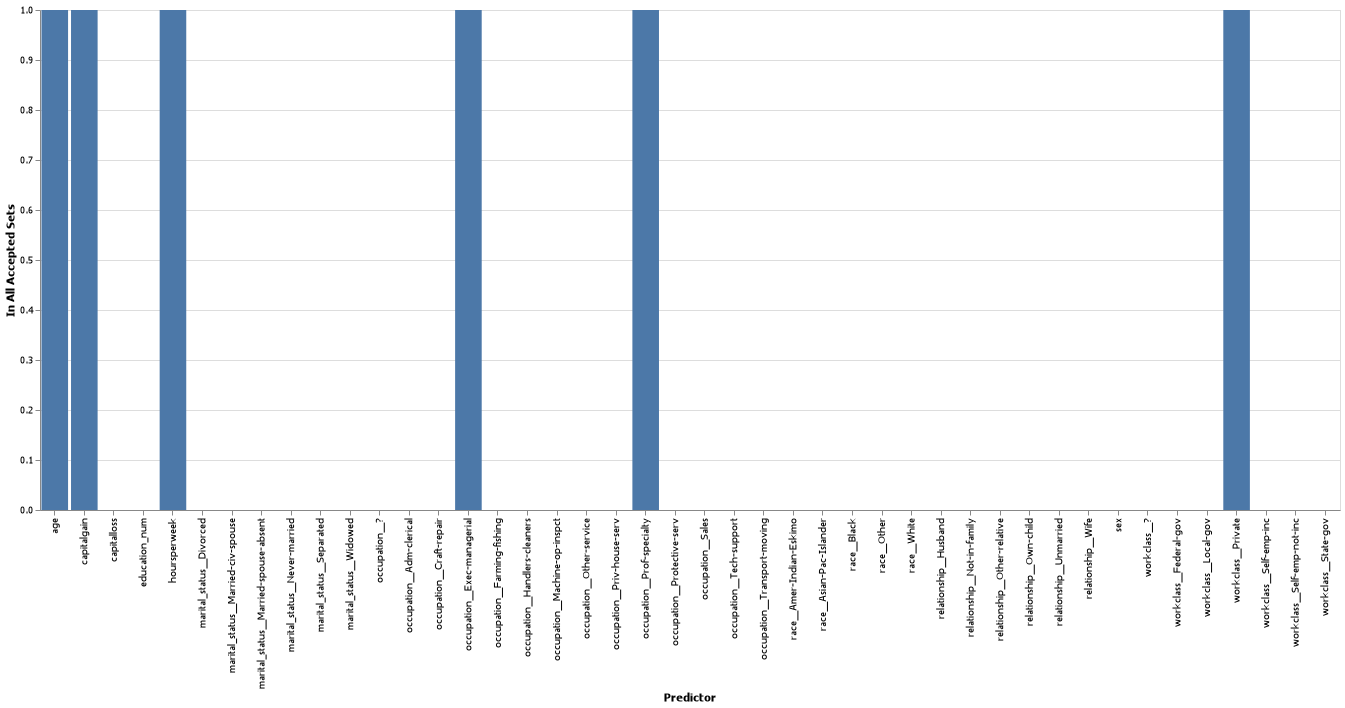

In [6]:
barPlotICPCasualPredictors( rLatin.X, rLatin.casualPredictors, 1300)

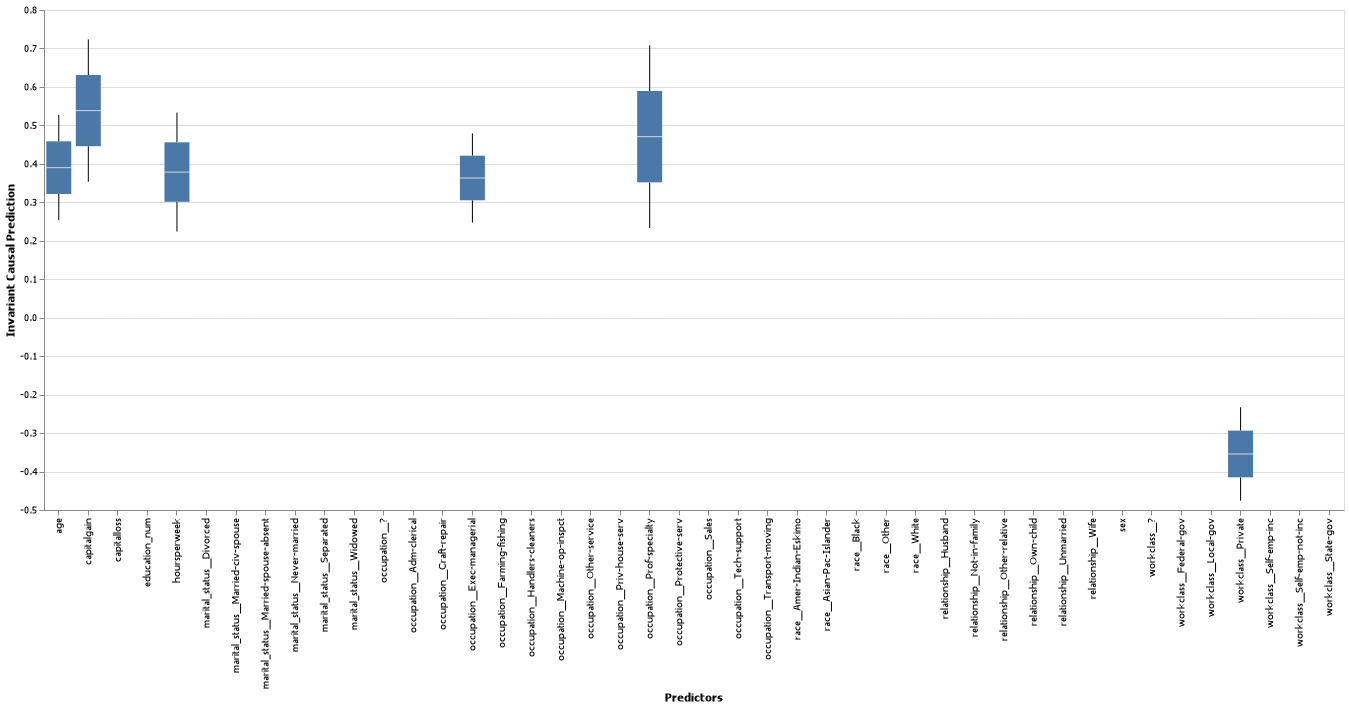

In [7]:
boxPlotICPconfidenceIntervals( rLatin.X, rLatin.ConfInt, 1300)

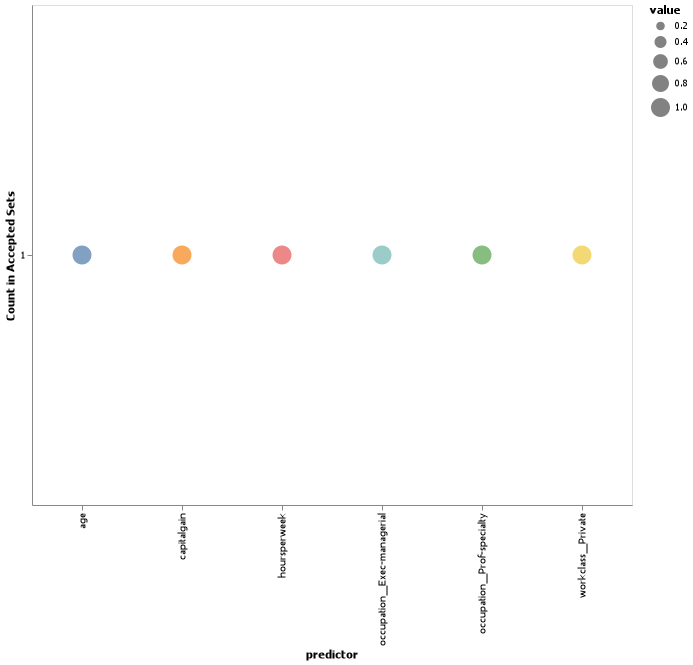

In [8]:
plotICPacceptedSets( rLatin.X, rLatin.acceptedSets)

## Defining and Executing the Nonlinear Invariant Causal Prediction Model

We see below that the LinearInvariantCausalPrediction function does not find any *Invariant Casual Predictors* for Canada, and the United States.

In [3]:
X = select(dfSalary, Not([:class, :native_country]))       
Y = select(dfSalary, [:class]) 
E = select(dfSalary, [:native_country]) 

r = LinearInvariantCausalPrediction!(X, Y, E, α = 0.10)

Experiment Indicator Integer Mapper
 Canada --> 1
 United-States --> 2
Two targests in Y thus doing Logistic Classification
Y Integer Mapper
 <=50K --> 0
 >50K --> 1


┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @437.
└ @ MLJBase C:\Users\BCP\.julia\packages\MLJBase\uMlf8\src\machines.jl:317
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning C:\Users\BCP\.julia\packages\MLJTuning\TShXP\src\tuned_models.jl:474
Evaluating over 49 metamodels: 100%[=========================] Time: 0:02:28


43-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.3786    0.0812    0.0158     marital_status__Married-civ-spouse
0.1864    0.1902    0.1095     capital_gain
0.1645    0.1059    0.1009     education_num
0.0821    0.1385    0.2275     age
0.0702    0.1158    0.1042     capital_loss
0.0409    0.0802    0.1338     hours_per_week
0.0126    0.0260    0.0282     occupation__Exec-managerial
0.0070    0.0147    0.0182     workclass__Self-emp-not-inc
0.0057    0.0144    0.0201     occupation__Prof-specialty
0.0054    0.0228    0.0091     occupation__Other-service
0.0042    0.0168    0.0081     occupation__Farming-fishing
0.0041    0.0103    0.0210     sex
0.0038    0.0148    0.0148     relationship__Wife
0.0033    0.0052    0.0120     occupation__Sales
0.0025    0.0170    0.0043     relationship__Own-child
0.0024    0.0068    0.0062     occupation__Tech-support
0.0024    0.0041    0.0096     occupation__Adm-clerical
0.0022    0.0015    0.0191     workclass__

[ Info: Training Machine{Pipeline262} @853.
[ Info: Training Machine{Pipeline262} @458.
[ Info: Training Machine{Pipeline262} @385.
[ Info: Training Machine{Pipeline262} @077.
[ Info: Training Machine{Standardizer} @999.
[ Info: Training Machine{Standardizer} @023.
[ Info: Training Machine{Standardizer} @527.
[ Info: Training Machine{Standardizer} @722.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @189.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @264.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @983.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @204.


      From worker 2:	getPValueLinear: ["hours_per_week"]
      From worker 3:	getPValueLinear: ["age", "education_num"]
      From worker 5:	getPValueLinear: ["marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @710.
[ Info: Training Machine{Standardizer} @791.
[ Info: Training Machine{Pipeline262} @034.
[ Info: Training Machine{Standardizer} @849.
[ Info: Training Machine{Pipeline262} @968.
[ Info: Training Machine{Standardizer} @748.


      From worker 4:	getPValueLinear: ["age", "capital_gain"]
      From worker 2:	getPValueLinear: ["age", "capital_loss"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @604.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @513.
[ Info: Training Machine{Pipeline262} @179.
[ Info: Training Machine{Standardizer} @342.


      From worker 5:	getPValueLinear: ["age", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @092.
[ Info: Training Machine{Standardizer} @311.
[ Info: Training Machine{Pipeline262} @622.
[ Info: Training Machine{Standardizer} @673.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @645.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @044.


      From worker 4:	getPValueLinear: ["age", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @237.


      From worker 3:	getPValueLinear: ["education_num", "capital_gain"]
      From worker 2:	getPValueLinear: ["education_num", "capital_loss"]


[ Info: Training Machine{Pipeline262} @752.
[ Info: Training Machine{Standardizer} @455.
[ Info: Training Machine{Pipeline262} @010.
[ Info: Training Machine{Standardizer} @532.
[ Info: Training Machine{Pipeline262} @719.
[ Info: Training Machine{Standardizer} @120.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @444.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @443.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @704.


      From worker 5:	getPValueLinear: ["education_num", "hours_per_week"]
      From worker 4:	getPValueLinear: ["education_num", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["capital_gain", "capital_loss"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @308.
[ Info: Training Machine{Pipeline262} @152.
[ Info: Training Machine{Standardizer} @203.
[ Info: Training Machine{Pipeline262} @412.
[ Info: Training Machine{Standardizer} @044.


      From worker 2:	getPValueLinear: ["capital_gain", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @048.
[ Info: Training Machine{Standardizer} @983.
[ Info: Training Machine{Pipeline262} @695.
[ Info: Training Machine{Standardizer} @799.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @838.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @151.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @647.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @430.


      From worker 5:	getPValueLinear: ["capital_loss", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @839.
[ Info: Training Machine{Standardizer} @777.


      From worker 3:	getPValueLinear: ["capital_loss", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @467.
[ Info: Training Machine{Standardizer} @255.
[ Info: Training Machine{Pipeline262} @204.
[ Info: Training Machine{Standardizer} @689.


      From worker 4:	getPValueLinear: ["capital_gain", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @864.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @378.
[ Info: Training Machine{Pipeline262} @566.
[ Info: Training Machine{Standardizer} @135.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @665.


      From worker 5:	getPValueLinear: ["age", "education_num", "capital_gain"]
      From worker 3:	getPValueLinear: ["age", "education_num", "hours_per_week"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capital_loss"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @051.
[ Info: Training Machine{Pipeline262} @225.
[ Info: Training Machine{Standardizer} @404.
[ Info: Training Machine{Pipeline262} @087.
[ Info: Training Machine{Standardizer} @025.


      From worker 4:	getPValueLinear: ["age", "education_num", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @672.
[ Info: Training Machine{Standardizer} @177.
[ Info: Training Machine{Pipeline262} @203.
[ Info: Training Machine{Standardizer} @959.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @688.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @564.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @926.


      From worker 5:	getPValueLinear: ["age", "capital_gain", "capital_loss"]
      From worker 2:	getPValueLinear: ["age", "capital_gain", "hours_per_week"]
      From worker 3:	getPValueLinear: ["age", "capital_gain", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @869.
[ Info: Training Machine{Standardizer} @001.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @293.
[ Info: Training Machine{Pipeline262} @761.
[ Info: Training Machine{Standardizer} @475.
[ Info: Training Machine{Pipeline262} @855.
[ Info: Training Machine{Standardizer} @859.


      From worker 4:	getPValueLinear: ["age", "capital_loss", "hours_per_week"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @811.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @764.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @935.


      From worker 5:	getPValueLinear: ["age", "capital_loss", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["age", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @344.
[ Info: Training Machine{Standardizer} @311.
[ Info: Training Machine{Pipeline262} @386.
[ Info: Training Machine{Standardizer} @799.
[ Info: Training Machine{Pipeline262} @984.
[ Info: Training Machine{Standardizer} @318.


      From worker 3:	getPValueLinear: ["education_num", "capital_gain", "capital_loss"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @034.
[ Info: Training Machine{Pipeline262} @736.
[ Info: Training Machine{Standardizer} @927.


      From worker 4:	getPValueLinear: ["education_num", "capital_gain", "hours_per_week"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @400.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @795.
[ Info: Training Machine{Pipeline262} @953.
[ Info: Training Machine{Standardizer} @324.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @928.


      From worker 5:	getPValueLinear: ["education_num", "capital_gain", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["education_num", "capital_loss", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @244.
[ Info: Training Machine{Pipeline262} @002.
[ Info: Training Machine{Standardizer} @966.
[ Info: Training Machine{Standardizer} @427.


      From worker 3:	getPValueLinear: ["education_num", "capital_loss", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @522.
[ Info: Training Machine{Pipeline262} @689.
[ Info: Training Machine{Standardizer} @736.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @462.


      From worker 4:	getPValueLinear: ["education_num", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @328.
[ Info: Training Machine{Pipeline262} @091.
[ Info: Training Machine{Standardizer} @032.


      From worker 2:	getPValueLinear: ["capital_gain", "capital_loss", "marital_status__Married-civ-spouse"]
      From worker 5:	getPValueLinear: ["capital_gain", "capital_loss", "hours_per_week"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @929.
[ Info: Training Machine{Pipeline262} @971.
[ Info: Training Machine{Standardizer} @300.
[ Info: Training Machine{Pipeline262} @386.
[ Info: Training Machine{Standardizer} @481.


      From worker 3:	getPValueLinear: ["capital_gain", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @162.
[ Info: Training Machine{Pipeline262} @244.
[ Info: Training Machine{Standardizer} @406.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @687.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @243.


      From worker 4:	getPValueLinear: ["capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @997.
[ Info: Training Machine{Standardizer} @397.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @981.


      From worker 5:	getPValueLinear: ["age", "education_num", "capital_gain", "capital_loss"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capital_gain", "hours_per_week"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capital_gain", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @450.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @137.
[ Info: Training Machine{Standardizer} @594.
[ Info: Training Machine{Pipeline262} @626.
[ Info: Training Machine{Standardizer} @851.


      From worker 4:	getPValueLinear: ["age", "education_num", "capital_loss", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @884.
[ Info: Training Machine{Standardizer} @128.
[ Info: Training Machine{Pipeline262} @727.
[ Info: Training Machine{Standardizer} @907.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @325.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @435.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @259.


      From worker 5:	getPValueLinear: ["age", "education_num", "capital_loss", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @537.
[ Info: Training Machine{Pipeline262} @586.
[ Info: Training Machine{Standardizer} @579.


      From worker 2:	getPValueLinear: ["age", "education_num", "hours_per_week", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["age", "capital_gain", "capital_loss", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @259.
[ Info: Training Machine{Standardizer} @675.
[ Info: Training Machine{Pipeline262} @236.
[ Info: Training Machine{Standardizer} @220.


      From worker 4:	getPValueLinear: ["age", "capital_gain", "capital_loss", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @392.


      From worker 5:	getPValueLinear: ["age", "capital_gain", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @229.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @169.
[ Info: Training Machine{Standardizer} @099.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @737.
[ Info: Training Machine{Pipeline262} @444.
[ Info: Training Machine{Standardizer} @042.


      From worker 2:	getPValueLinear: ["age", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["education_num", "capital_gain", "capital_loss", "hours_per_week"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @210.
[ Info: Training Machine{Pipeline262} @272.
[ Info: Training Machine{Standardizer} @269.


      From worker 4:	getPValueLinear: ["education_num", "capital_gain", "capital_loss", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @042.
[ Info: Training Machine{Standardizer} @007.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @073.
[ Info: Training Machine{Pipeline262} @158.
[ Info: Training Machine{Standardizer} @846.


      From worker 5:	getPValueLinear: ["education_num", "capital_gain", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @069.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @935.


      From worker 2:	getPValueLinear: ["education_num", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["capital_gain", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @185.
[ Info: Training Machine{Standardizer} @896.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @118.
[ Info: Training Machine{Pipeline262} @608.
[ Info: Training Machine{Standardizer} @688.


      From worker 4:	getPValueLinear: ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]


[ Info: Training Machine{Pipeline262} @878.
[ Info: Training Machine{Standardizer} @968.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @764.


      From worker 5:	getPValueLinear: ["age", "education_num", "capital_gain", "capital_loss", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @946.
[ Info: Training Machine{Standardizer} @257.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @179.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @066.


      From worker 2:	getPValueLinear: ["age", "education_num", "capital_gain", "hours_per_week", "marital_status__Married-civ-spouse"]
      From worker 3:	getPValueLinear: ["age", "education_num", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @459.
[ Info: Training Machine{Standardizer} @664.
[ Info: Training Machine{Pipeline262} @334.
[ Info: Training Machine{Standardizer} @962.
[ Info: Training Machine{Pipeline262} @357.
[ Info: Training Machine{Standardizer} @221.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @986.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @987.


      From worker 4:	getPValueLinear: ["age", "capital_gain", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @483.
[ Info: Training Machine{Pipeline262} @119.
[ Info: Training Machine{Standardizer} @249.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @103.


      From worker 5:	getPValueLinear: ["education_num", "capital_gain", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]
      From worker 2:	getPValueLinear: ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week", "marital_status__Married-civ-spouse"]


[ Info: Training Machine{Pipeline262} @142.
[ Info: Training Machine{Standardizer} @908.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @028.
[ Info: Training Machine{Pipeline262} @784.
[ Info: Training Machine{Standardizer} @497.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @468.
[ Info: Training Machine{LinearBinaryClassifier{LogitLink}} @847.



Accepted Sets:
[1, 2]
[1, 4]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 17]
[1, 3, 4]
[1, 4, 5]
[2, 4, 17]
[1, 2, 3, 4]
[1, 2, 3, 5]
[1, 2, 3, 17]
[1, 2, 4, 5]
[1, 2, 4, 17]
[1, 2, 5, 17]
[1, 2, 3, 4, 5]
[1, 2, 3, 4, 17]
[1, 2, 4, 5, 17]
[1, 2, 3, 4, 5, 17]


Confidence Intervals:
Predictor                           	  Low       	  High      	  Difference 	
age                                 	  0.000000	  0.659290 	  0.659290
education_num                       	  0.000000	  0.963587 	  0.963587
capital_gain                        	  0.000000	  0.000000 	  0.000000
capital_loss                        	  0.000000	  0.269797 	  0.269797
hours_per_week                      	  0.000000	  0.547882 	  0.547882
workclass__?                        	  0.000000	  0.000000 	  0.000000
workclass__Federal-gov              	  0.000000	  0.000000 	  0.000000
workclass__Local-gov                	  0.000000	  0.000000 	  0.000000
workclass__Never-worked             	  0.000000	  0.000000 	  0.000000
workcl

(X = 43794×48 DataFrame. Omitted printing of 44 columns
│ Row   │ age     │ education_num │ capital_gain │ capital_loss │
│       │ Float64 │ Float64       │ Float64      │ Float64      │
├───────┼─────────┼───────────────┼──────────────┼──────────────┤
│ 1     │ 35.0    │ 16.0          │ 0.0          │ 0.0          │
│ 2     │ 33.0    │ 13.0          │ 0.0          │ 0.0          │
│ 3     │ 54.0    │ 13.0          │ 0.0          │ 0.0          │
│ 4     │ 20.0    │ 9.0           │ 0.0          │ 0.0          │
│ 5     │ 49.0    │ 16.0          │ 0.0          │ 0.0          │
│ 6     │ 68.0    │ 13.0          │ 0.0          │ 0.0          │
│ 7     │ 35.0    │ 13.0          │ 0.0          │ 0.0          │
│ 8     │ 42.0    │ 11.0          │ 0.0          │ 0.0          │
│ 9     │ 61.0    │ 4.0           │ 3456.0       │ 0.0          │
│ 10    │ 77.0    │ 4.0           │ 0.0          │ 0.0          │
⋮
│ 43784 │ 43.0    │ 10.0          │ 0.0          │ 0.0          │
│ 43785 │ 43.0    

Thus, we need to run nonlinear IPC for Canada, and the United States.  The nonlinear models are random forests.  

In [6]:
X = select(dfSalaryF, Not([:class, :native_country]))       
Y = select(dfSalaryF, [:class]) 
E = select(dfSalaryF, [:native_country]) 

rCanUS = ForestInvariantCausalPrediction!(X, Y, E, α = 0.10)

Experiment Indicator Integer Mapper
 Canada --> 0
 United-States --> 1
Two targests in Y thus doing Random Forest Classification
Y Integer Mapper
 <=50K --> 0
 >50K --> 1


┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @391.
└ @ MLJBase C:\Users\BCP\.julia\packages\MLJBase\uMlf8\src\machines.jl:317
┌ Info: Attempting to evaluate 11 models.
└ @ MLJTuning C:\Users\BCP\.julia\packages\MLJTuning\TShXP\src\tuned_models.jl:474
Evaluating over 11 metamodels: 100%[=========================] Time: 0:00:07


Computing Shapley Effect of Random Forest using 43794 random rows.  It might take a few minutes
Computing Shapley Effect of Random Forest using 21897 random rows.  It might take a few minutes
Shapley Effect of Random Forest
11×3 DataFrame
│ Row │ feature_name   │ mean_effect │ meanEffectPercent │
│     │ String         │ Float64     │ Float64           │
├─────┼────────────────┼─────────────┼───────────────────┤
│ 1   │ education_num  │ 0.0644122   │ 0.144101          │
│ 2   │ relationship   │ 0.0629995   │ 0.140941          │
│ 3   │ marital_status │ 0.0626608   │ 0.140183          │
│ 4   │ age            │ 0.0553348   │ 0.123794          │
│ 5   │ occupation     │ 0.0507726   │ 0.113587          │
│ 6   │ hours_per_week │ 0.045064    │ 0.100816          │
│ 7   │ capital_gain   │ 0.0425393   │ 0.095168          │
│ 8   │ workclass      │ 0.0260995   │ 0.0583891         │
│ 9   │ capital_loss   │ 0.018224    │ 0.0407702         │
│ 10  │ sex            │ 0.010337    │ 0.0231258     

[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @031.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @794.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @586.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:02


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @321.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @026.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @096.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 4:	InvariantEnvironmentPrediction: ["workclass"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 5:	InvariantEnvironmentPrediction: ["marital_status"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @631.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @818.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @153.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 3:	InvariantEnvironmentPrediction: ["occupation"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @734.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 2:	InvariantEnvironmentPrediction: ["relationship"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:03
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @376.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @261.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @523.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @011.
[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @080.
[ Info: Attempting to evaluate 3 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:02


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @502.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @780.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Attempting to evaluate 2 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "hours_per_week"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @796.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "workclass"]


[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @362.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @518.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @816.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "marital_status"]


[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @371.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @589.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["age", "occupation"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @298.
[ Info: Attempting to evaluate 3 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @329.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @443.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @655.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @815.
[ Info: Attempting to evaluate 3 models.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @698.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @147.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "workclass"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @449.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @776.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @388.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @236.
[ Info: Attempting to evaluate 3 models.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "marital_status"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @779.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @211.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @203.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @870.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "relationship"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @863.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @796.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @337.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @278.
[ Info: Attempting to evaluate 3 models.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "workclass"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "marital_status"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @374.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @541.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @305.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @660.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "occupation"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @448.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @557.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @463.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @931.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 3:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass"]
      From worker 2:	InvariantEnvironmentPrediction: ["hours_per_week", "marital_status"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @843.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @202.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @317.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @996.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["hours_per_week", "occupation"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["hours_per_week", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @518.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @562.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @645.
[ Info: Attempting to evaluate 3 models.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @835.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:03
      From worker 3:	InvariantEnvironmentPrediction: ["workclass", "marital_status"]
      From worker 2:	InvariantEnvironmentPrediction: ["workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @698.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @139.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @035.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @410.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["workclass", "relationship"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @670.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @875.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @506.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:01
      From worker 3:	InvariantEnvironmentPrediction: ["marital_status", "relationship"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 2:	InvariantEnvironmentPrediction: ["occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @086.
[ Info: Attempting to evaluate 3 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @119.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @042.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @657.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @654.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @075.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @197.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass"]
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @209.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @920.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @395.
[ Info: Attempting to evaluate 3 models.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:02
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @792.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @679.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @019.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @014.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @177.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @938.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @467.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @578.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @442.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @992.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @779.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @877.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @491.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @724.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @715.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @167.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @804.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @084.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 4:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @943.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @286.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @526.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 3:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "occupation"]
      From worker 5:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @299.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @644.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @088.
[ Info: Attempting to evaluate 4 models.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["age", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @553.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @941.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 4:	InvariantEnvironmentPrediction: ["age", "workclass", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @325.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @935.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @244.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 3:	InvariantEnvironmentPrediction: ["age", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @899.
[ Info: Attempting to evaluate 4 models.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @167.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @820.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["age", "marital_status", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @636.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @279.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 4:	InvariantEnvironmentPrediction: ["age", "occupation", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @300.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @035.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @992.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @364.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @638.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @553.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "marital_status"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @560.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @040.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @171.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @617.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @952.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @170.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @086.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @616.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "marital_status"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @431.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @571.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @914.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @026.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @919.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @385.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @514.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @160.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "workclass", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @375.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @715.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "workclass", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @882.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @343.
[ Info: Attempting to evaluate 4 models.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @710.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "marital_status", "occupation"]
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "marital_status", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @876.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @418.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @746.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Attempting to evaluate 4 models.


      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "occupation", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @121.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @398.


      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass"]


[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @697.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @266.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @938.


      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "marital_status"]


[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @697.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @994.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @834.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @700.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @791.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @227.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @206.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @657.
[ Info: Attempting to evaluate 4 models.


      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @739.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @880.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @245.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @269.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @573.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "marital_status", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @771.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @157.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @115.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "occupation", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @020.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @776.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 2:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @653.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @313.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @481.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Attempting to evaluate 4 models.


      From worker 4:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @165.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @366.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @884.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 5:	InvariantEnvironmentPrediction: ["hours_per_week", "marital_status", "occupation"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 3:	InvariantEnvironmentPrediction: ["hours_per_week", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @147.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @134.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @870.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 2:	InvariantEnvironmentPrediction: ["hours_per_week", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @352.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @702.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 4:	InvariantEnvironmentPrediction: ["workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @153.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @518.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
      From worker 5:	InvariantEnvironmentPrediction: ["workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @751.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:05
      From worker 3:	InvariantEnvironmentPrediction: ["workclass", "occupation", "relationship"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @653.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @141.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06
      From worker 2:	InvariantEnvironmentPrediction: ["marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @258.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @621.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @979.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @106.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @568.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @840.
[ Info: Attempting to evaluate 5 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:04


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @286.
[ Info: Attempting to evaluate 4 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "marital_status"]
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:03


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @716.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "occupation"]


[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @832.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @221.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @591.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @690.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 5 models.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @500.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @515.
[ Info: Attempting to evaluate 5 models.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @347.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 5 models.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @262.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @110.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @105.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @877.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @266.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @416.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @684.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "marital_status"]


[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @034.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @972.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:13
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @062.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @092.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @606.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @828.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @372.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "marital_status", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @081.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @548.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @961.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @623.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Attempting to evaluate 5 models.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @360.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @915.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @901.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @839.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @579.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "occupation"]


[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @686.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @547.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @433.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @861.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @597.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:12
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @285.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @089.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @757.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @420.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @895.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "marital_status", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "marital_status", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @964.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @464.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @080.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @381.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "occupation", "relationship"]


[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @749.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @710.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "marital_status"]


[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @059.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @831.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "occupation"]
      From worker 3:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @524.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @382.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @462.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "marital_status", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @639.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @229.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @946.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @910.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @158.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 2:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @057.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "workclass", "marital_status", "occupation"]


[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @553.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @225.
[ Info: Attempting to evaluate 5 models.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["age", "workclass", "marital_status", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @897.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @489.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @491.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["age", "workclass", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @673.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @742.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 3:	InvariantEnvironmentPrediction: ["age", "marital_status", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @708.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @312.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @419.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @095.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @756.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @148.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @533.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @718.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @589.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @761.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @958.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @882.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @833.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @483.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @687.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @090.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "marital_status", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @523.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @689.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @482.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @307.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @887.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @262.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @087.
[ Info: Attempting to evaluate 5 models.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @434.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @027.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @015.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @608.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @402.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @544.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @732.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @907.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @112.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:12
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @070.


      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "workclass", "marital_status", "occupation"]


[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @563.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @264.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @761.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @458.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "workclass", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @195.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @273.
[ Info: Attempting to evaluate 5 models.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @672.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "marital_status", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @263.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @354.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @030.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:05
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @939.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @066.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @394.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @161.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @960.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "marital_status", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @436.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @435.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @684.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @186.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @809.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @862.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @523.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @532.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "marital_status", "relationship"]
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @948.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @735.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @927.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @991.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @323.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 5:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "marital_status", "occupation"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @826.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @090.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @248.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
      From worker 3:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "marital_status", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:06
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
      From worker 2:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @836.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @788.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @737.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:05
      From worker 4:	InvariantEnvironmentPrediction: ["hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @757.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @300.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:10
      From worker 5:	InvariantEnvironmentPrediction: ["workclass", "marital_status", "occupation", "relationship"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @168.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @262.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @859.
[ Info: Attempting to evaluate 5 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass"]
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:07
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:11
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @350.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @976.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @000.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:09
Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:05


[ Info: Attempting to evaluate 6 models.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @817.
[ Info: Attempting to evaluate 5 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @216.
[ Info: Attempting to evaluate 6 models.


Evaluating over 5 metamodels: 100%[=========================] Time: 0:00:05
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @175.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @825.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @094.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @552.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @345.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "occupation"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @978.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @621.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @561.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @839.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @979.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @096.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @587.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @131.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @818.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @883.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @319.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @125.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @360.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @227.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @164.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @170.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @328.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @616.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "marital_status", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @704.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "occupation", "relationship"]


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @485.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @444.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @509.
[ Info: Attempting to evaluate 6 models.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @796.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @968.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @003.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @072.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @777.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @893.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @327.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "marital_status"]


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @674.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @016.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @553.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 6 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @273.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @429.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @529.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @370.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "marital_status", "occupation"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @384.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @320.
[ Info: Attempting to evaluate 6 models.
[ Info: Attempting to evaluate 6 models.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "marital_status", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @799.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @966.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Attempting to evaluate 6 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @576.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @990.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @927.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @470.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "marital_status", "relationship"]


[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @171.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @751.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @297.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @072.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @938.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
      From worker 4:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @847.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @008.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 5:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @702.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @105.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @048.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 2:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
      From worker 3:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @037.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @245.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @842.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @086.
[ Info: Attempting to evaluate 6 models.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @883.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 6 models.


      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @970.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @788.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @616.


      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "occupation"]


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @567.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @443.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @624.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @774.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "marital_status", "occupation"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @629.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09


[ Info: Attempting to evaluate 6 models.


      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @844.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @501.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @379.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @790.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @620.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @208.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @680.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "marital_status", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @215.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @078.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @445.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @902.


      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "marital_status", "occupation", "relationship"]


[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @200.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @274.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @976.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @634.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "marital_status", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @372.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @612.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @435.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:07
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @223.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @039.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "workclass", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @231.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @484.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @778.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "marital_status", "occupation"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @030.


      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "marital_status", "relationship"]

[ Info: Attempting to evaluate 6 models.


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @985.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @023.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @317.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08


[ Info: Attempting to evaluate 6 models.


      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @549.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:12
      From worker 3:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @976.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @433.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @380.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["capital_gain", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 5:	InvariantEnvironmentPrediction: ["hours_per_week", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @080.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @185.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @373.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:14
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @980.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @124.
[ Info: Attempting to evaluate 7 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @766.
[ Info: Attempting to evaluate 6 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "occupation"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @909.
[ Info: Attempting to evaluate 6 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @105.
[ Info: Attempting to evaluate 7 models.


Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:08
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "relationship"]
Evaluating over 6 metamodels: 100%[=========================] Time: 0:00:09
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "marital_status", "occupation"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @567.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @513.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @671.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @943.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "marital_status", "relationship"]


[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @700.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @045.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:13
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:21


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @419.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @273.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:13
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "marital_status", "occupation"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:18


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @045.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @160.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "marital_status", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @964.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @408.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @991.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @889.
[ Info: Attempting to evaluate 7 models.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @066.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:10


[ Info: Attempting to evaluate 7 models.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @925.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @256.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @556.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @319.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:19


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @054.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Attempting to evaluate 7 models.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @867.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @425.
[ Info: Attempting to evaluate 7 models.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:13
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:19


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @754.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:13


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @869.
[ Info: Attempting to evaluate 7 models.


      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @030.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @265.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12


[ Info: Attempting to evaluate 7 models.


      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @683.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 2:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @202.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @166.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17
      From worker 3:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @830.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @555.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @842.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @414.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @517.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15
      From worker 5:	InvariantEnvironmentPrediction: ["age", "capital_gain", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:18


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @074.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @618.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:13
      From worker 2:	InvariantEnvironmentPrediction: ["age", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @181.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @349.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @065.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @561.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @254.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @867.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @701.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @821.
[ Info: Attempting to evaluate 7 models.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 2:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:17


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @778.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @893.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @198.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @082.
[ Info: Attempting to evaluate 7 models.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 4:	InvariantEnvironmentPrediction: ["education_num", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @792.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @115.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["capital_gain", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:18


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @277.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11


[ Info: Attempting to evaluate 7 models.


      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @615.
[ Info: Attempting to evaluate 7 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @179.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @813.
[ Info: Attempting to evaluate 8 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:10
      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "relationship"]
Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:15


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @462.
[ Info: Attempting to evaluate 7 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @275.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:12
      From worker 4:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "occupation", "relationship"]


[ Info: Attempting to evaluate 8 models.


Evaluating over 7 metamodels: 100%[=========================] Time: 0:00:11
      From worker 5:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "marital_status", "occupation", "relationship"]
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:19


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @282.
[ Info: Attempting to evaluate 8 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @097.
[ Info: Attempting to evaluate 8 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @274.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:18


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @912.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:15
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "workclass", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @302.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:22


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @523.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:21
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @888.


      From worker 3:	InvariantEnvironmentPrediction: ["age", "education_num", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]


[ Info: Attempting to evaluate 8 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @506.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:15
      From worker 4:	InvariantEnvironmentPrediction: ["age", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:21
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:16


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @907.


      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]


[ Info: Attempting to evaluate 8 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @773.
[ Info: Attempting to evaluate 8 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @427.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:19


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @088.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:13
      From worker 2:	InvariantEnvironmentPrediction: ["age", "education_num", "capital_gain", "hours_per_week", "workclass", "marital_status", "occupation", "relationship"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @239.
[ Info: Attempting to evaluate 9 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:19


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @704.
[ Info: Attempting to evaluate 8 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:15
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:23
Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:14


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @837.
[ Info: Attempting to evaluate 8 models.


Evaluating over 9 metamodels: 100%[=========================] Time: 0:00:20


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @987.
[ Info: Attempting to evaluate 9 models.


Evaluating over 8 metamodels: 100%[=========================] Time: 0:00:10
Evaluating over 9 metamodels: 100%[=========================] Time: 0:00:09

Accepted Sets:
[1]
[2]
[3]
[5]
[6]
[7]
[8]
[9]
[1, 2]
[1, 3]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[2, 3]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[6, 7]
[6, 8]
[6, 9]
[7, 8]
[7, 9]
[8, 9]
[1, 2, 3]
[1, 2, 5]
[1, 2, 6]
[1, 2, 7]
[1, 2, 8]
[1, 2, 9]
[1, 3, 5]
[1, 3, 6]
[1, 3, 7]
[1, 3, 8]
[1, 3, 9]
[1, 5, 6]
[1, 5, 7]
[1, 5, 8]
[1, 5, 9]
[1, 6, 7]
[1, 6, 8]
[1, 6, 9]
[1, 7, 8]
[1, 7, 9]
[1, 8, 9]
[2, 3, 5]
[2, 3, 6]
[2, 3, 7]
[2, 3, 8]
[2, 3, 9]
[2, 5, 6]
[2, 5, 7]
[2, 5, 8]
[2, 5, 9]
[2, 6, 7]
[2, 6, 8]
[2, 6, 9]
[2, 7, 8]
[2, 7, 9]
[2, 8, 9]
[3, 5, 6]
[3, 5, 7]
[3, 5, 8]
[3, 5, 9]
[3, 6, 7]
[3, 6, 8]
[3, 6, 9]
[3, 7, 8]
[3, 7, 9]
[3, 8, 9]
[5, 6, 7]
[5, 6, 8]
[5, 6, 9]
[5, 7, 8]
[5, 7, 9]
[5, 8, 9]
[6, 7, 8]
[6, 7, 9]
[6, 8, 9]
[7, 8, 9]
[1, 2, 3, 5]
[1, 2, 3, 6]
[1, 2, 3, 7]
[1, 2

(X = 43794×11 DataFrame. Omitted printing of 7 columns
│ Row   │ age     │ education_num │ capital_gain │ capital_loss │
│       │ Float64 │ Float64       │ Float64      │ Float64      │
├───────┼─────────┼───────────────┼──────────────┼──────────────┤
│ 1     │ 35.0    │ 16.0          │ 0.0          │ 0.0          │
│ 2     │ 33.0    │ 13.0          │ 0.0          │ 0.0          │
│ 3     │ 54.0    │ 13.0          │ 0.0          │ 0.0          │
│ 4     │ 20.0    │ 9.0           │ 0.0          │ 0.0          │
│ 5     │ 49.0    │ 16.0          │ 0.0          │ 0.0          │
│ 6     │ 68.0    │ 13.0          │ 0.0          │ 0.0          │
│ 7     │ 35.0    │ 13.0          │ 0.0          │ 0.0          │
│ 8     │ 42.0    │ 11.0          │ 0.0          │ 0.0          │
│ 9     │ 61.0    │ 4.0           │ 3456.0       │ 0.0          │
│ 10    │ 77.0    │ 4.0           │ 0.0          │ 0.0          │
⋮
│ 43784 │ 43.0    │ 10.0          │ 0.0          │ 0.0          │
│ 43785 │ 43.0    │

- Random Forest with Shapley selection for Canada and USA: *education_num*, *relationship*, *marital_status*, *age*, *occupation*, *hours_per_week*, *capital_gain*, *workclass* 

As seen above, nonlinear IPC did not find any invariant casual predictors for Canada and United states.  Let us try doing United States only and including only those with capital gains.  The experiment indicator is the gender.  

In [5]:
X = select(dfUSASalaryCaptialGains, Not([:class, :sex]))       
Y = select(dfUSASalaryCaptialGains, [:class]) 
E = select(dfUSASalaryCaptialGains, [:sex]) 

rUSAForest = ForestInvariantCausalPrediction!(X, Y, E, α = 0.05)

labelEncoder: Removing column :native_country since it has only one category value
Experiment Indicator Integer Mapper
 Female --> 0
 Male --> 1
Two targests in Y thus doing Random Forest Classification
Y Integer Mapper
 <=50K --> 0
 >50K --> 1


┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @552.
└ @ MLJBase C:\Users\BCP\.julia\packages\MLJBase\uMlf8\src\machines.jl:317
┌ Info: Attempting to evaluate 10 models.
└ @ MLJTuning C:\Users\BCP\.julia\packages\MLJTuning\TShXP\src\tuned_models.jl:474
Evaluating over 10 metamodels: 100%[=========================] Time: 0:00:01


Computing Shapley Effect of Random Forest using 3467 random rows.  It might take a few minutes
Shapley Effect of Random Forest
10×3 DataFrame
│ Row │ feature_name   │ mean_effect │ meanEffectPercent │
│     │ String         │ Float64     │ Float64           │
├─────┼────────────────┼─────────────┼───────────────────┤
│ 1   │ capital_gain   │ 0.415407    │ 0.740211          │
│ 2   │ marital_status │ 0.0726324   │ 0.129423          │
│ 3   │ education_num  │ 0.0187242   │ 0.0333645         │
│ 4   │ occupation     │ 0.0177579   │ 0.0316427         │
│ 5   │ age            │ 0.0166186   │ 0.0296126         │
│ 6   │ hours_per_week │ 0.0129795   │ 0.0231281         │
│ 7   │ workclass      │ 0.00708105  │ 0.0126177         │
│ 8   │ capital_loss   │ 0.0         │ 0.0               │
│ 9   │ race           │ 0.0         │ 0.0               │
│ 10  │ relationship   │ 0.0         │ 0.0               │

Random Forest with Shapley selection:  Any["capital_gain", "marital_status", "education_nu

[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @222.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @809.
[ Info: Attempting to evaluate 2 models.
[ Info: Attempting to evaluate 3 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @207.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Attempting to evaluate 2 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @130.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @270.
[ Info: Attempting to evaluate 2 models.
[ Info: Attempting to evaluate 2 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:00
      From worker 5:	InvariantEnvironmentPrediction: ["education_num", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @894.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:00
      From worker 2:	InvariantEnvironmentPrediction: ["capital_gain", "marital_status"]
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @286.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @981.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @162.
[ Info: Attempting to evaluate 2 models.
[ Info: Attempting to evaluate 2 models.
[ Info: Attempting to evaluate 3 models.


Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:00
Evaluating over 2 metamodels: 100%[=========================] Time: 0:00:00
      From worker 3:	InvariantEnvironmentPrediction: ["education_num", "capital_gain", "marital_status"]


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @759.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @192.
[ Info: Attempting to evaluate 4 models.
[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @881.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:00
Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @703.
[ Info: Attempting to evaluate 3 models.


Evaluating over 3 metamodels: 100%[=========================] Time: 0:00:00
Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:01


[ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @741.
[ Info: Attempting to evaluate 4 models.


Evaluating over 4 metamodels: 100%[=========================] Time: 0:00:00

Accepted Sets:
[3]
[2, 3]
[3, 7]
[2, 3, 7]


Invariant Casual Predictors:
3 = capital_gain	



(X = 3467×10 DataFrame. Omitted printing of 6 columns
│ Row  │ age     │ education_num │ capital_gain │ capital_loss │
│      │ Float64 │ Float64       │ Float64      │ Float64      │
├──────┼─────────┼───────────────┼──────────────┼──────────────┤
│ 1    │ 44.0    │ 10.0          │ 7688.0       │ 0.0          │
│ 2    │ 63.0    │ 15.0          │ 3103.0       │ 0.0          │
│ 3    │ 65.0    │ 9.0           │ 6418.0       │ 0.0          │
│ 4    │ 48.0    │ 9.0           │ 3103.0       │ 0.0          │
│ 5    │ 45.0    │ 9.0           │ 7298.0       │ 0.0          │
│ 6    │ 46.0    │ 10.0          │ 7688.0       │ 0.0          │
│ 7    │ 54.0    │ 10.0          │ 3908.0       │ 0.0          │
│ 8    │ 22.0    │ 9.0           │ 14084.0      │ 0.0          │
│ 9    │ 34.0    │ 13.0          │ 3103.0       │ 0.0          │
│ 10   │ 42.0    │ 9.0           │ 5178.0       │ 0.0          │
⋮
│ 3457 │ 90.0    │ 4.0           │ 2653.0       │ 0.0          │
│ 3458 │ 40.0    │ 12.0          │

- Random Forest with Shapley selection for USA capital gainers:  *capital_gain*, *marital_status*, and *education_num* 

Voila!  We have invariant Casual Predictors in the random forest.  The answer to our question, Why Some Are Able Earn More Than 50 Thousands a Year?, is given by the *Invariant Casual Predictors*.  

Invariant Casual Predictors 
- 3 = capital_gain

Having capital gains cause earning more than 50 thousand a year when the population is divided among gender.  The experiment or environment setting is gender in this case.  Investing is what you need to create the ability to make more than 50 thousand a year in the United States in the 1990s. This is so with 95% confidence.  There is correlation between education and the target variable. Yet, education does not play a major invariant causal prediction role which I find interesting (and mad about all those college bills I paid.)  Do you agree with linear ICP findings?  

## Graphs

Now, let us plot the USA capital gainers results.  There are not any confidence intervals for Julia nonlinear IPC yet.  The higher the count of an accepted predictor (X column), the stronger is the predictor for invariant causation

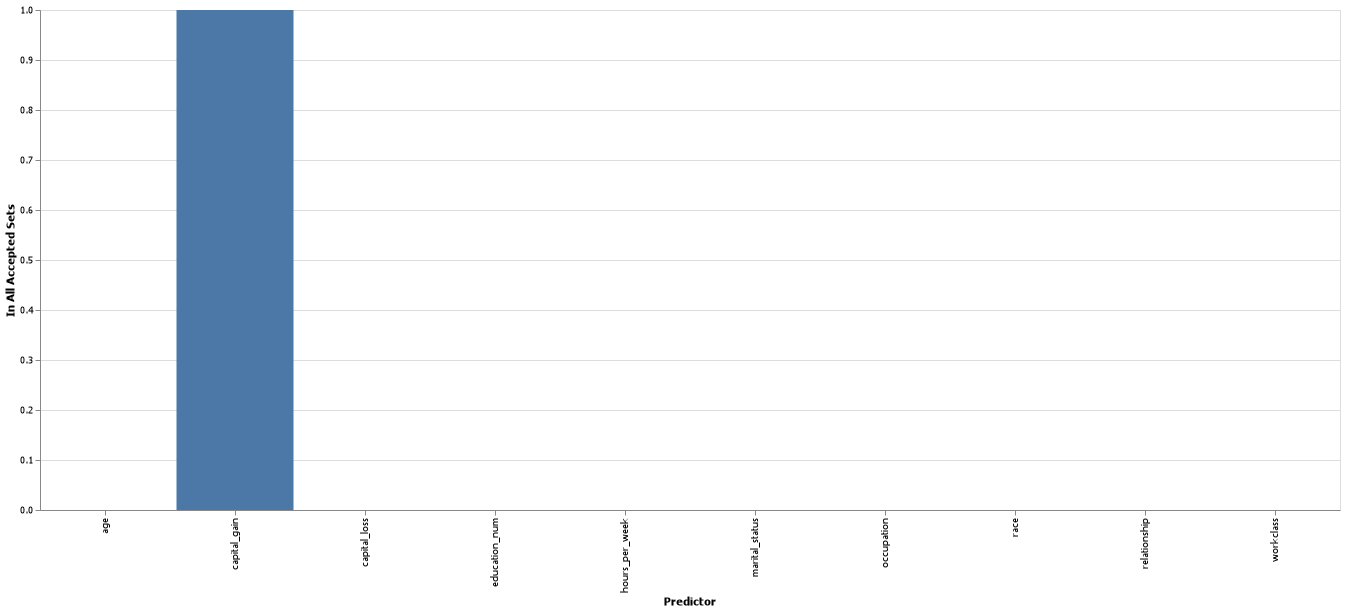

In [15]:
barPlotICPCasualPredictors( rUSAForest.X, rUSAForest.casualPredictors, 1300)

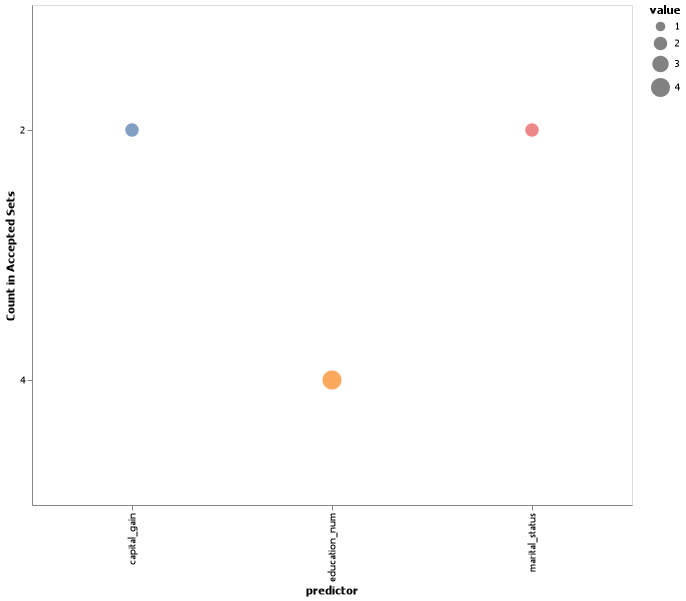

In [17]:
plotICPacceptedSets( rUSAForest.X, rUSAForest.acceptedSets)

## Running and Input Arguments of the Invariant Causal Prediction Julia Functions

Let us go over the input arguments of the IPC Julia function calls.  They are very similar but simpler to the R version function definitions.  There is a sequential function and a parallel function for each linear and nonlinear ICP.  The default is the parallel one.  Yet, the sequential version is helpful for debugging and data testing.  

It is interesting to observe the power **alpha** over the *Invariant Casual Predictors* in the result set.  A small **alpha** like 0.01 might result in small set of *Invariant Casual Predictors* in linear ICP.  A higher **alpha** like 0.09 might result in a larger set of *Invariant Casual Predictors* in linear ICP keeping all else constant.  Which is more realistic to your business question?

Please note that the binary classifiers are random models.  Thus, executing an ICP binary classifier a second time but with the same data as in the first might produce different results.  

If you are in Windows operating system, consider elevating the priority of the Julia processes.  Run the following Windows command before the parallel workers have been created and after the call the IPC function from the Jullia REPL.

C:\Users>**wmic process where name="julia.exe" CALL setpriority "high priority"**


In [ ]:
LinearInvariantCausalPrediction!(X, Y, ExpInd; α=0.01, selection=booster, verbose=true)
Searching in parallel over subsets in `X[,S]` for direct causes of `Y`
# Arguments
* `X`:                 DataFrame of the predictors. No missing values are allowed
* `Y`:                 DataFrame of the target.  Binary for classification or floats for regression. No missing values are allowed
* `ExpInd`:            DataFrame of environment indicators (e.g. 1, 2, ...)
* `α`:                 significance level (e.g. 0.01 or 0.05)
* `selection`:         if all, will include all the predictors else XGBooster selects the predictors
* `verbose`:           if true, will print each subset tested and some other output
                    
                    
ForestInvariantCausalPrediction!(X, Y, ExpInd; α=0.01, selection=forest, verbose=true)
Searching in parallel over subsets in `X[,S]` for direct causes of `Y`
# Arguments
* `X`:                 DataFrame of the predictors. No missing values are allowed
* `Y`:                 DataFrame of the target.  Binary for classification or floats for regression. No missing values are allowed
* `ExpInd`:            DataFrame of environment indicators (e.g. 1, 2, ...)
* `α`:                 significance level (e.g. 0.01 or 0.05)
* `selection`:         if all, will include all the predictors.  If booster, XGBooster selects the predictors.  Else random forest with Shapley selects the predictors
* `verbose`:           if true, will print each subset tested and some other output

                                        

#######################################################################################################################################################################                                                                                                                                                                
boxPlotICPconfidenceIntervals(X, ConfInt)
Creates a box plot of the `ConfInt` created from 'X' 
# Arguments
* `X`:                 as returned by InvariantCausalPrediction function 
* `ConfInt`:           as returned by InvariantCausalPrediction function 
* `width`:             optial plot width
* `height`:            optial plot height
                                                                                        
                                                                                        
plotICPacceptedSets(X, acceptedSets)
Creates a circle plot of the predictor count in the 'acceptedSets' created from 'X' 
The larger the circle, the strong the predictor
# Arguments
* `X`:                 as returned by InvariantCausalPrediction function 
* `acceptedSets`:      as returned by InvariantCausalPrediction function 
* `width`:             optial plot width
* `height`:            optial plot height
                                                                                        
                                                                                        
barPlotICPCasualPredictors(X, casualPredictors)
Creates a bar plot of the 'casualPredictors' created from 'X' 
# Arguments
* `X`:                 as returned by InvariantCausalPrediction function 
* `casualPredictors`:  as returned by InvariantCausalPrediction function 
* `width`:             optial plot width
* `height`:            optial plot height                                                                                        

                                                                
                                                                
#######################################################################################################################################################################                                                                                                                                                                                                       
LinearInvariantCausalPredictionSequential!(X, Y, ExpInd; α=0.01, selection=booster, verbose=true)
Searching over subsets in `X[,S]` for direct causes of `Y`
# Arguments
* `X`:                 DataFrame of the predictors. No missing values are allowed
* `Y`:                 DataFrame of the target.  Binary for classification or floats for regression. No missing values are allowed
* `ExpInd`:            DataFrame of environment indicators (e.g. 1, 2, ...)
* `α`:                 significance level (e.g. 0.01 or 0.05)
* `selection`:         if all, will include all the predictors else XGBooster selects the predictors
* `verbose`:           if true, will print each subset tested and some other output

                                                            
ForestInvariantCausalPredictionSequential!(X, Y, ExpInd; α=0.01, selection=forest, verbose=true)
Searching over subsets in `X[,S]` for direct causes of `Y`
# Arguments
* `X`:                 DataFrame of the predictors. No missing values are allowed
* `Y`:                 DataFrame of the target.  Binary for classification or floats for regression. No missing values are allowed
* `ExpInd`:            DataFrame of environment indicators (e.g. 1, 2, ...)
* `α`:                 significance level (e.g. 0.01 or 0.05)
* `selection`:         if all, will include all the predictors.  If booster, XGBooster selects the predictors.  Else random forest with Shapley selects the predictors
* `verbose`:           if true, will print each subset tested and some other output
                                                                                
                                                                                    

## Conclusion

Correlation does not imply causation.  Invariant Causal Prediction (ICP) is a great method allowing us to do both.  One is to find causality between the target variable and the predictors of the dataset. And two, one can predict using some of the dataset variables. The original [InvariantCausalPrediction](https://cran.rproject.org/web/packages/InvariantCausalPrediction/index.html) (ICP) and [nonlinear ICP](https://cran.r-project.org/web/packages/nonlinearICP/index.html) were implemented in R language.  This lab shows an implementation in pure [Julia](https://julialang.org) 1.4.2 of the core R language functionality of ICP. 
There are numerous improvements over the original R programming.  The Julia version improves in speed, and memory usage via parallelism.  Code supportability, and usability is enhanced also.  There are new [VegaLite](https://www.queryverse.org/VegaLite.jl/stable) plots of the ICP results.  The ICP results are clearer.  

The data is the [adult salary](https://www.openml.org/d/1590) set from [OpenML](https://www.openml.org/search?type=data).  The data is from 1995 but it contains data from many countries.  The lab handles a much larger data set than what the R version of ICP can process. 

It is a challenge to create such causal inference modeling.  It requires new ways of thinking and advanced mathematics. The computation is expensive in time and/or memory.  One must be very careful defining the target and the predictors of the model. That is some of the reasons casual interference is missing from many popular machine learning libraries such as Python’s Scikit-learn.


# About the Author

Clarman Cruz completed his BS/MS in Computer Science from State University of New York at Stony Brook/Albany. He has more than 15 years technology experience in the banking industry.  He recently started his Master of Data Science from [Central Connecticut State University](https://www2.ccsu.edu/program/DataScience_MS]).